# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
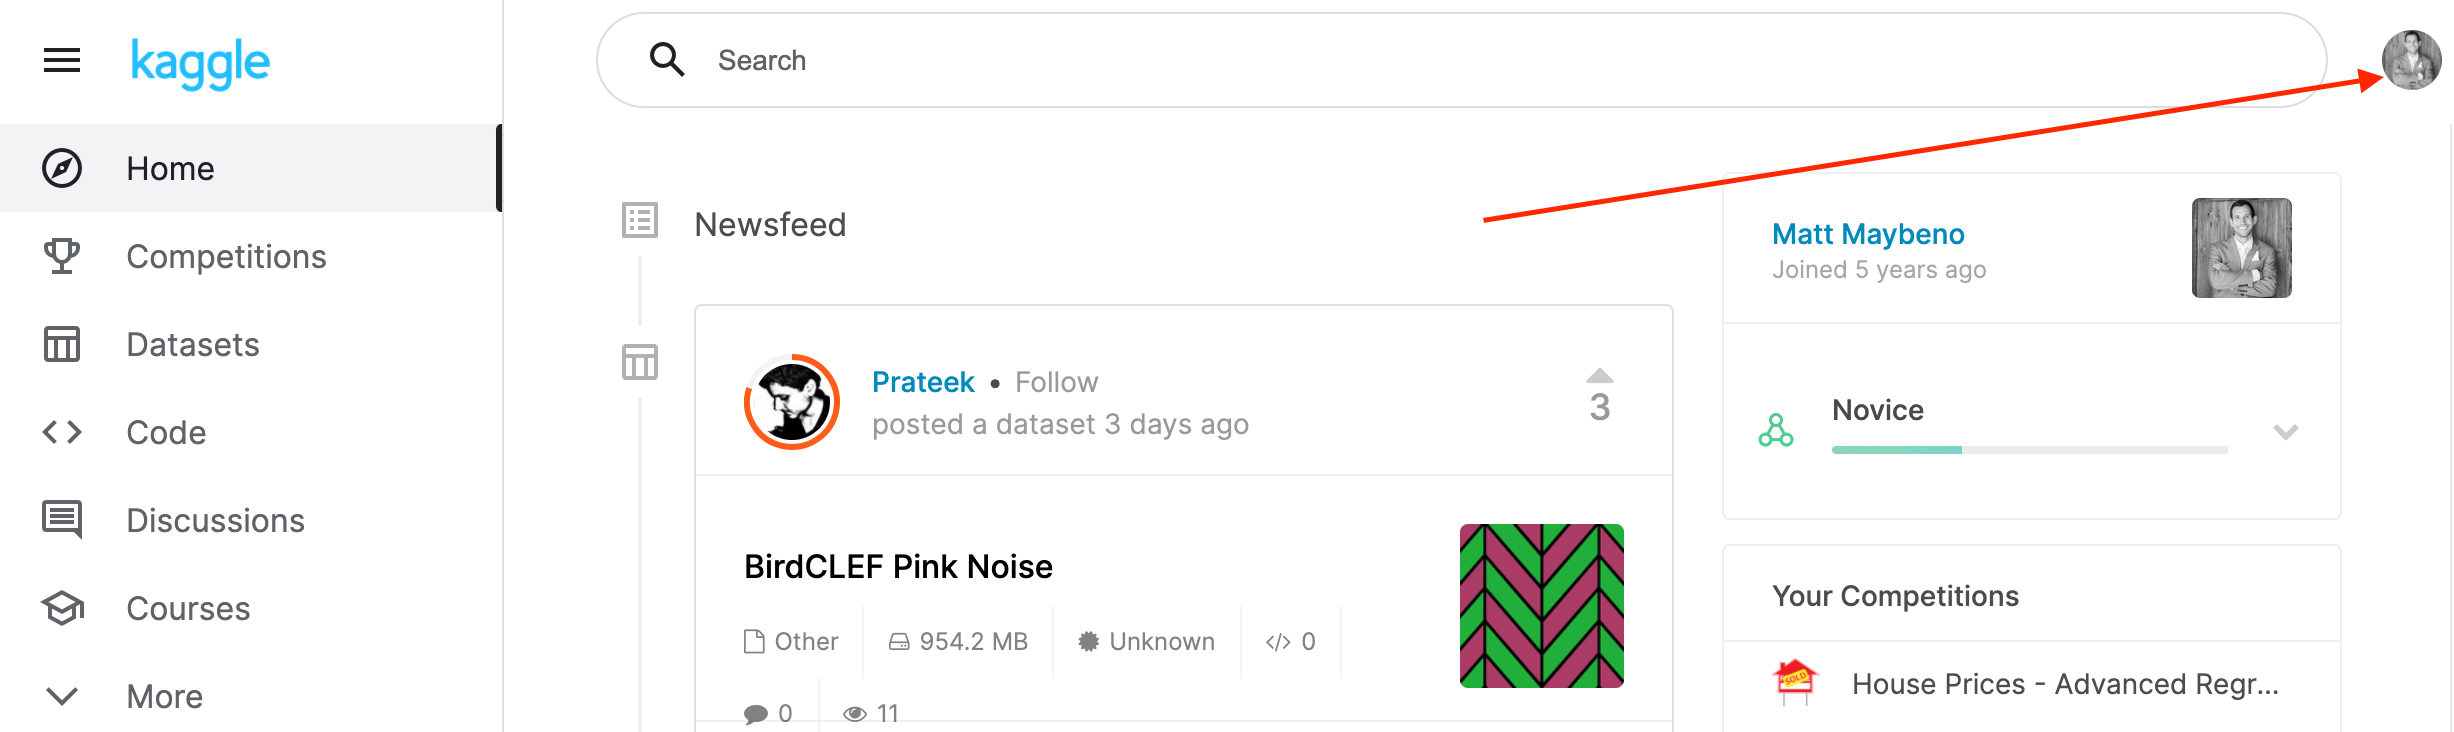
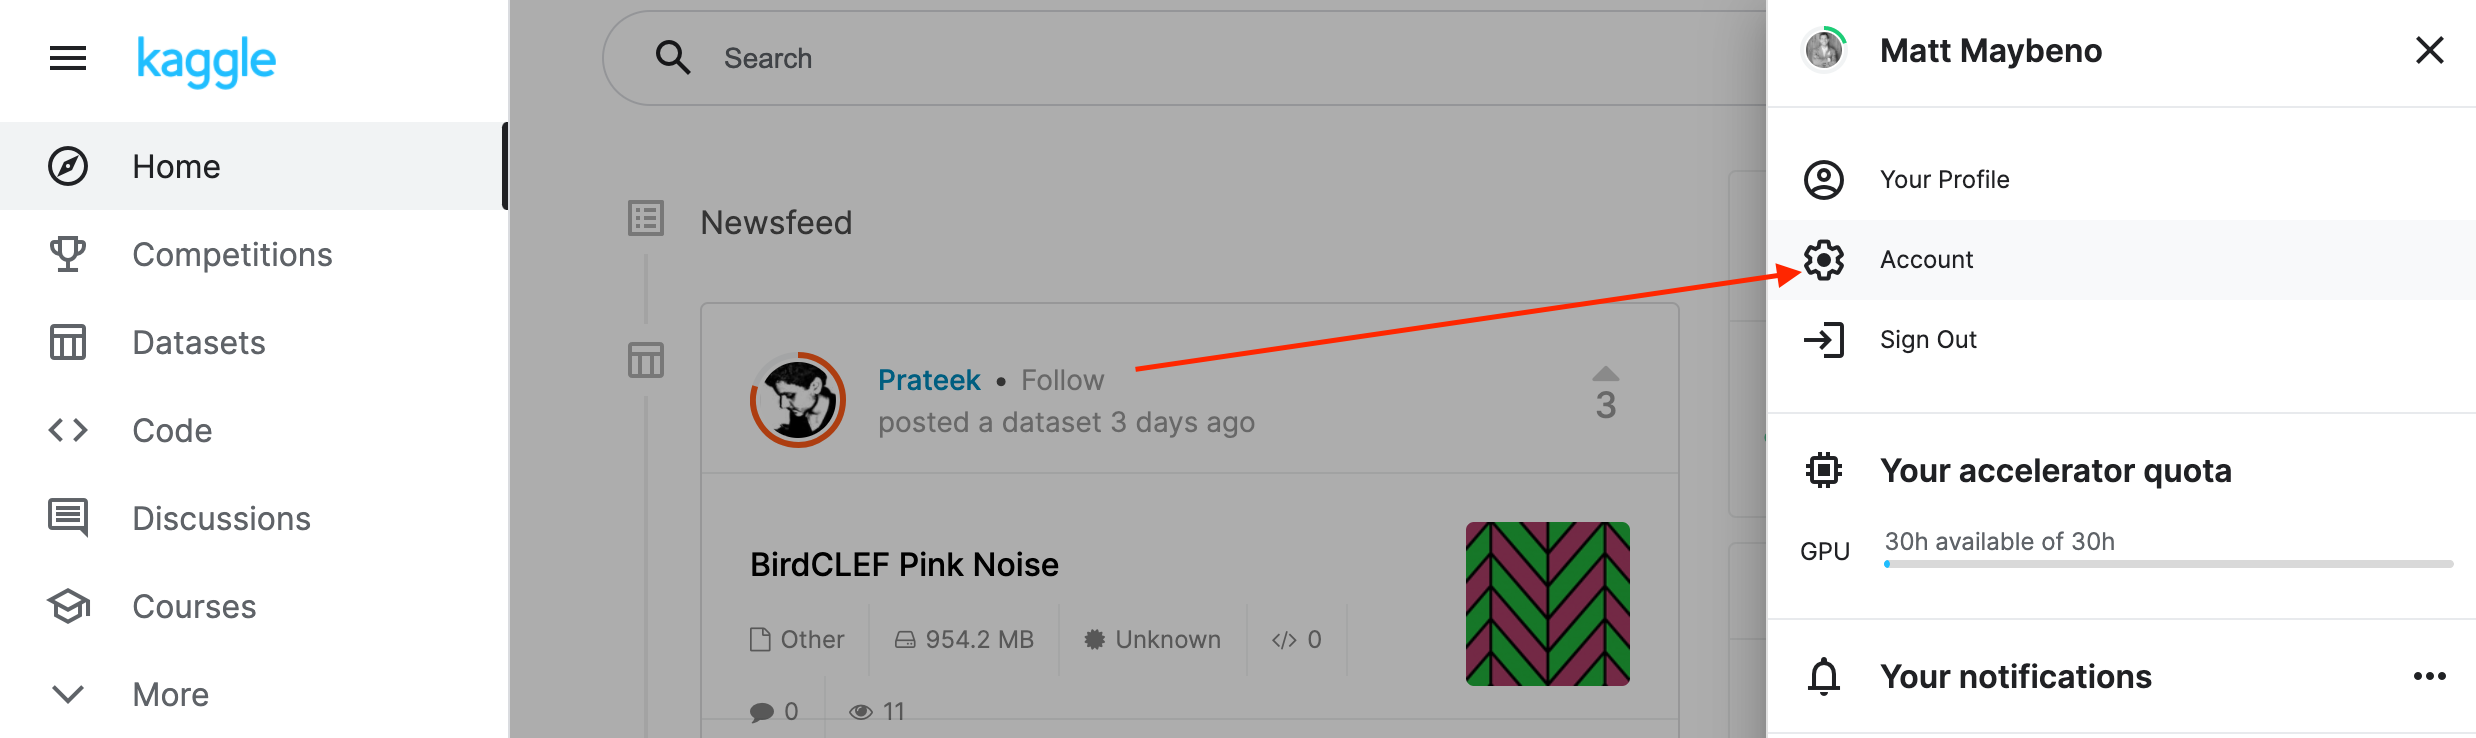
2. Scroll down to API and click Create New API Token.
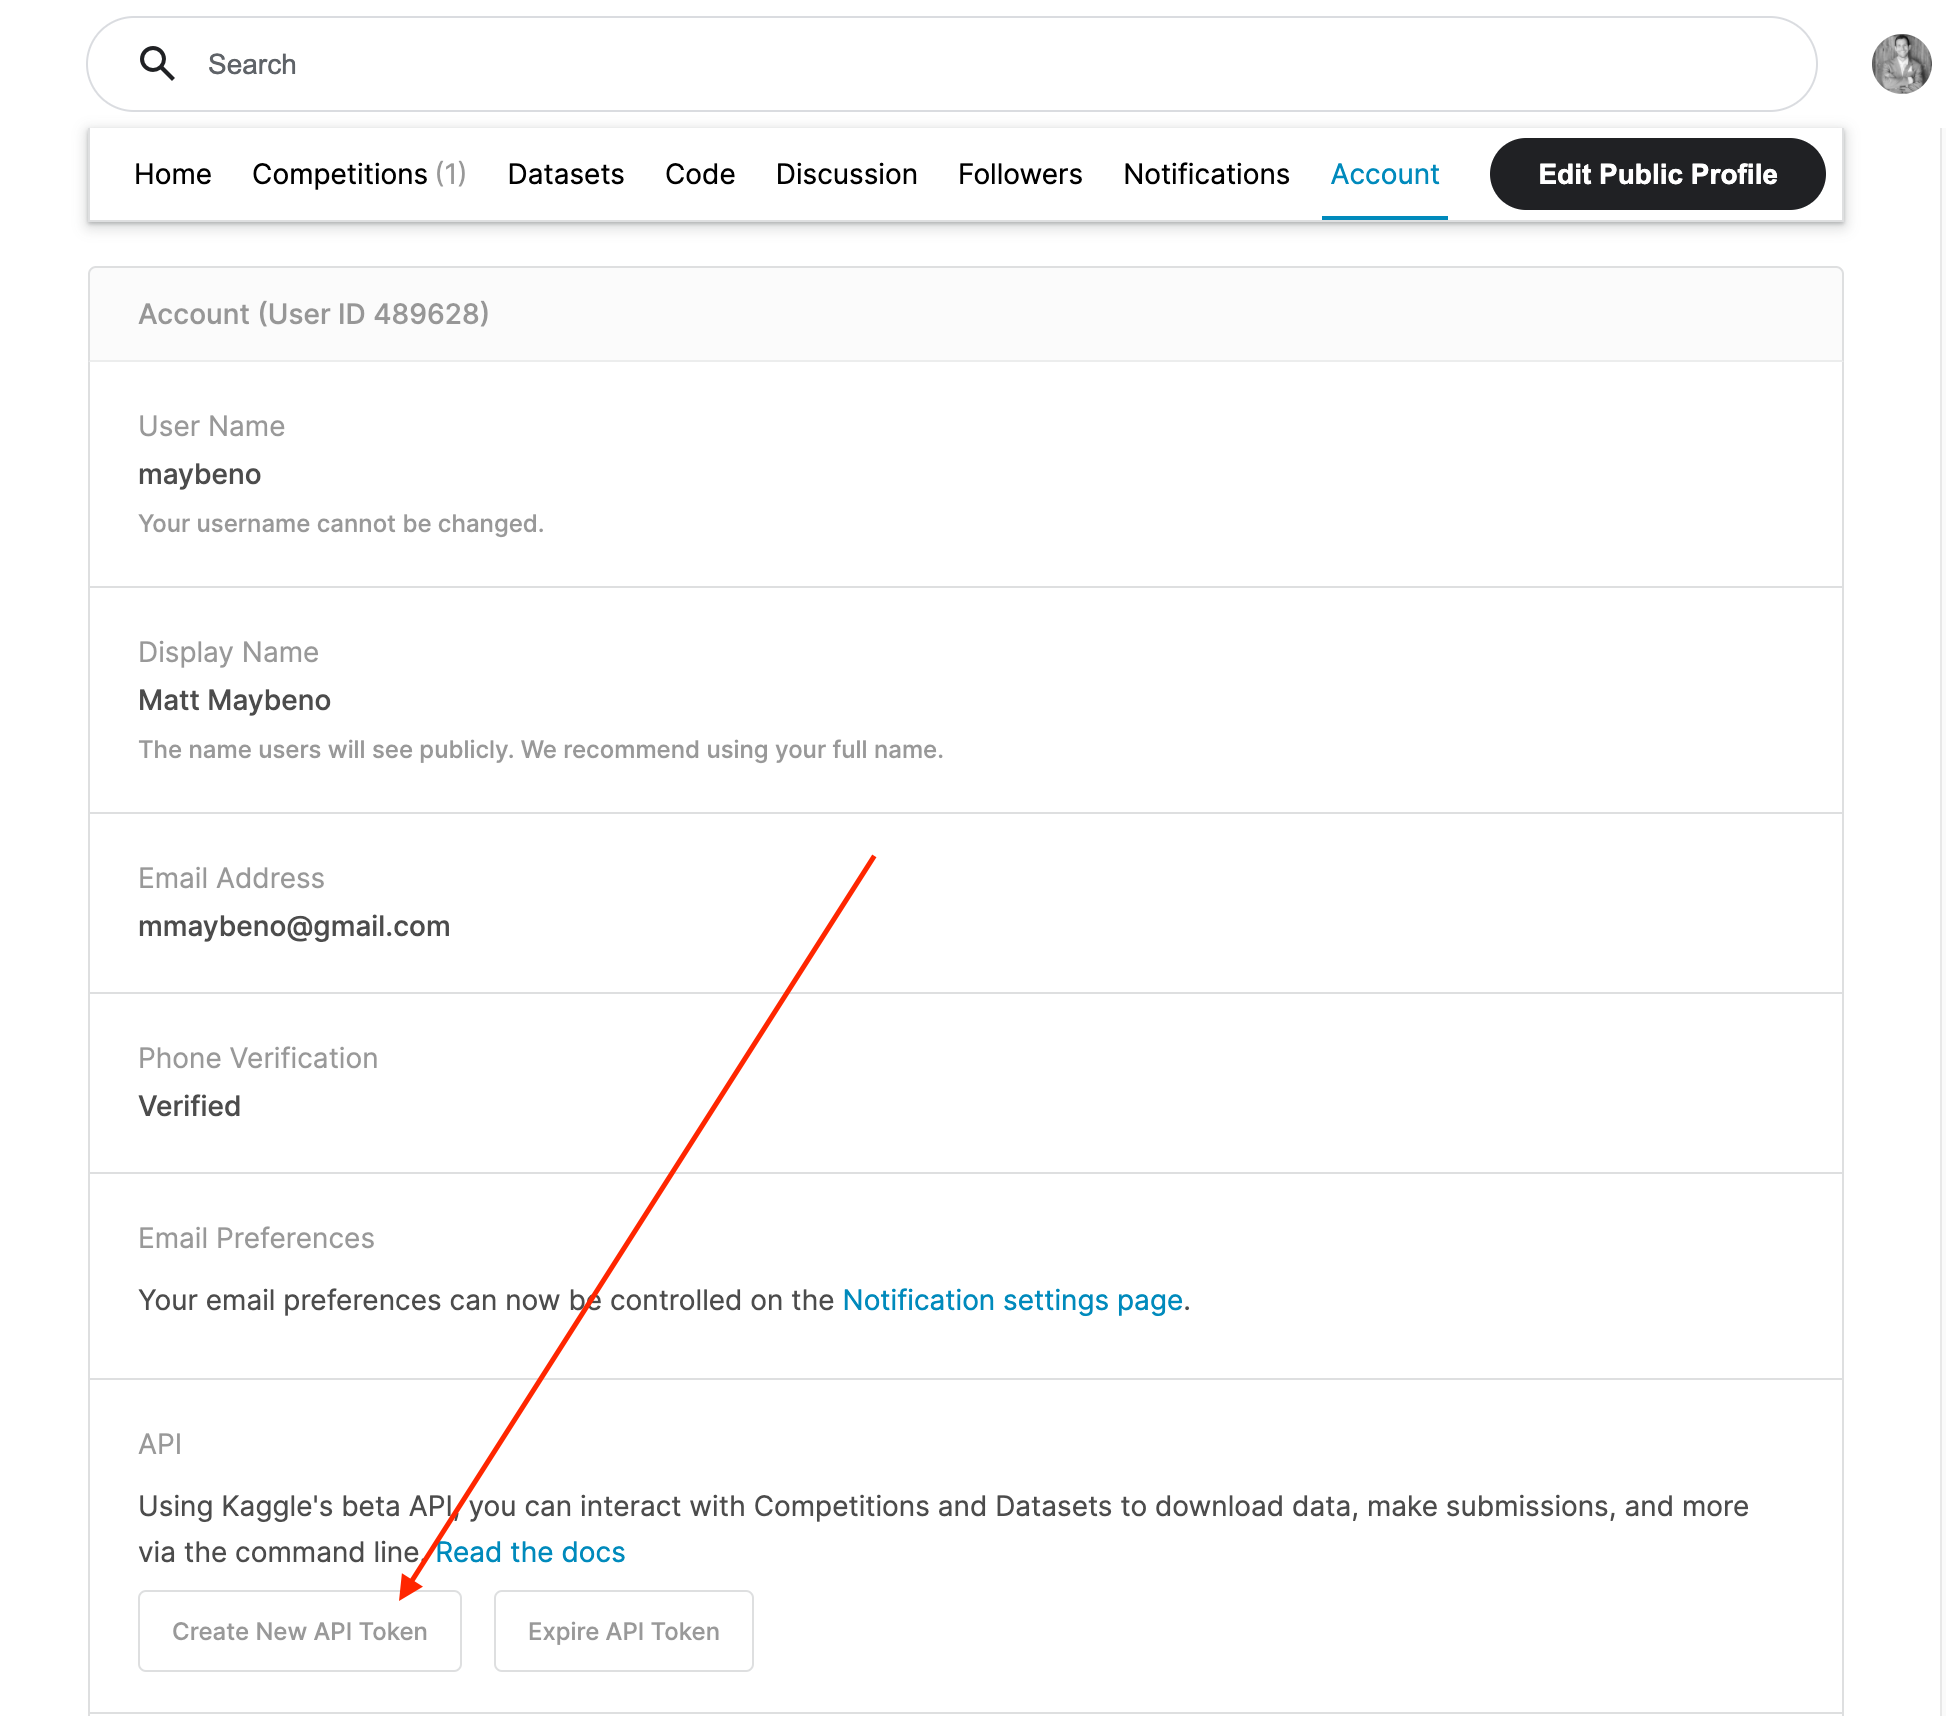
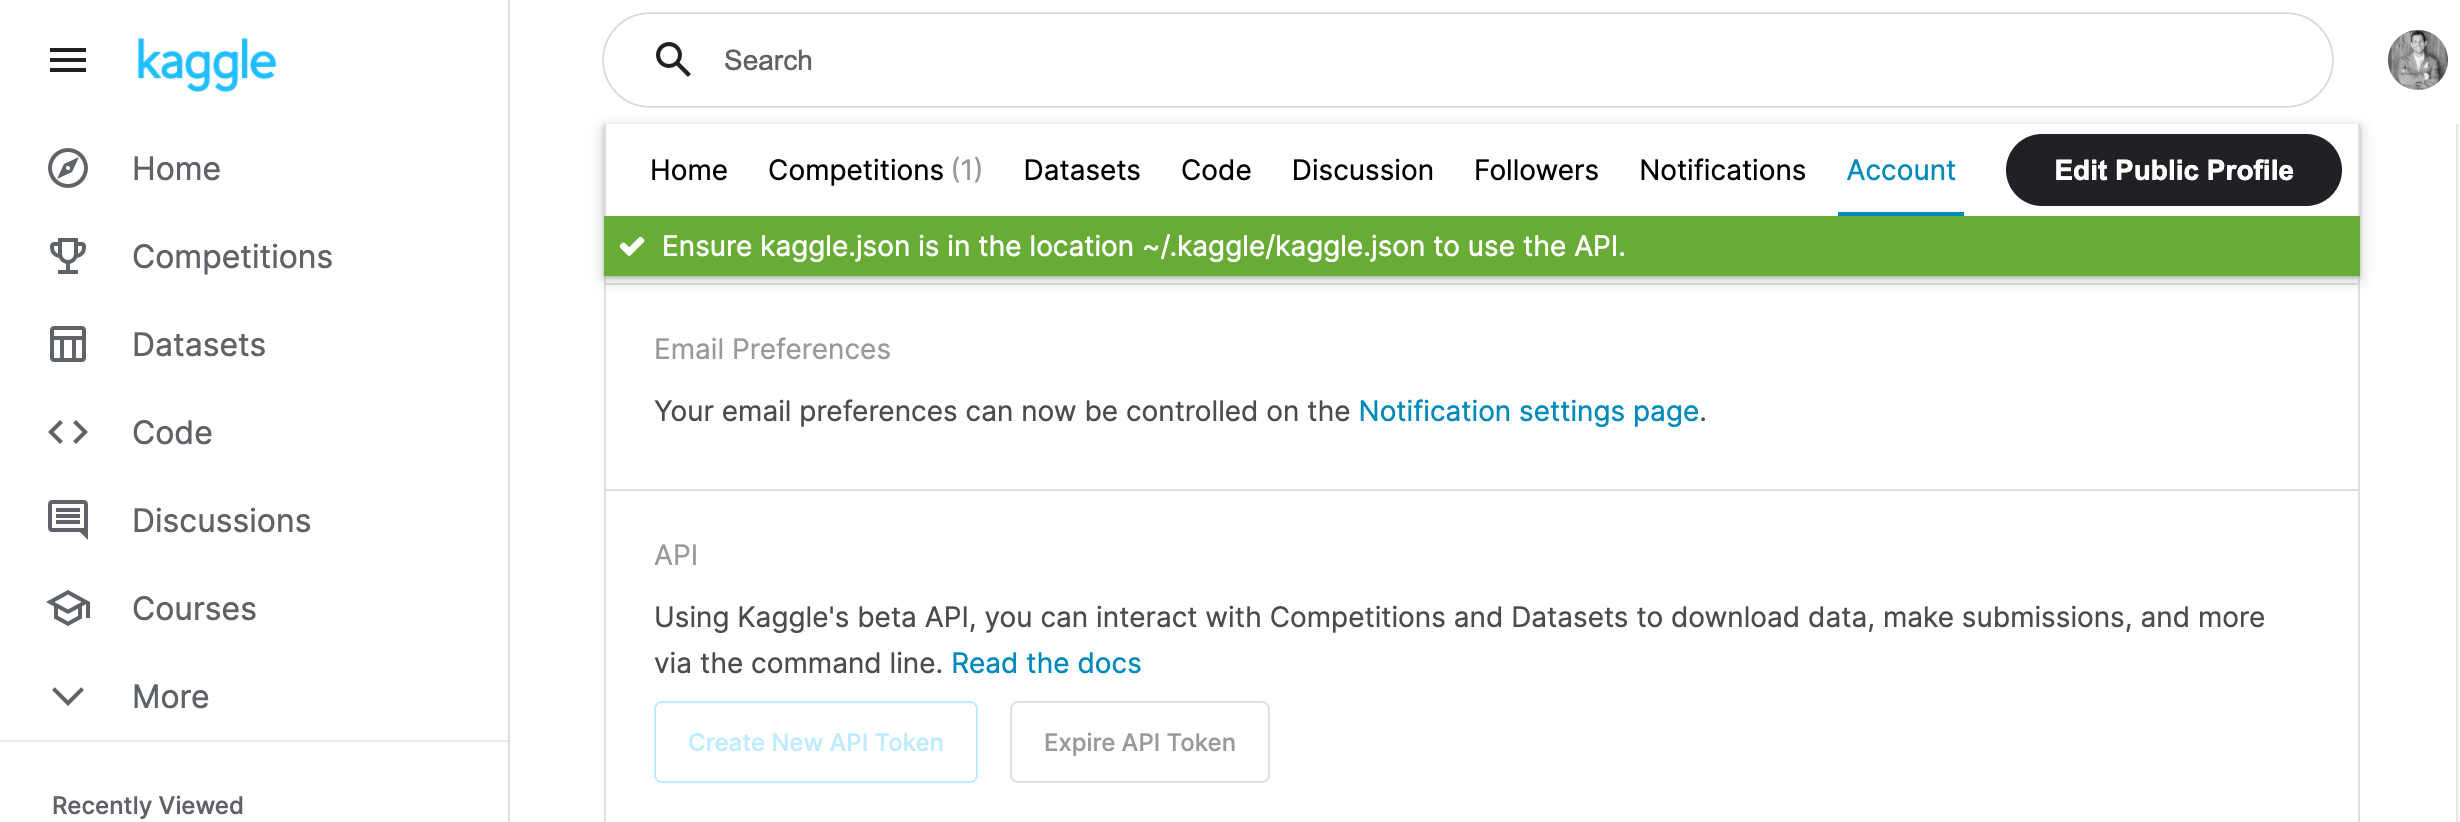
3. Open up `kaggle.json` and use the username and key.
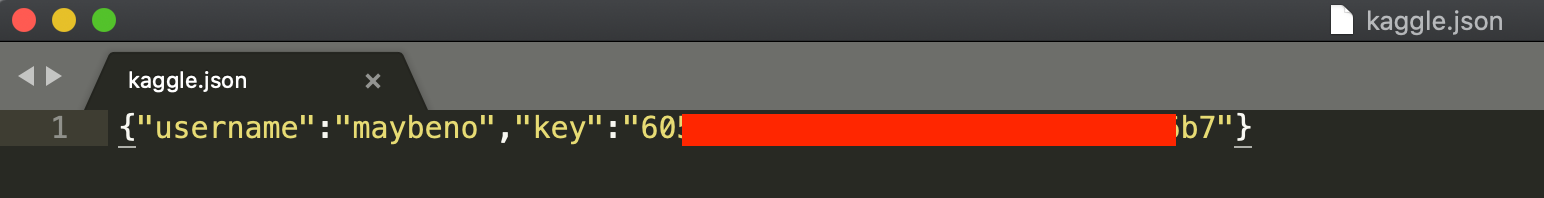

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Public\\Documents\\Wondershare\\CreatorTemp\\pip-uninstall-3dcgrmz4\\pip.exe'
Consider using the `--user` option or check the permissions.



  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "FILL_IN_USERNAME"
kaggle_key = "FILL_IN_KEY"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
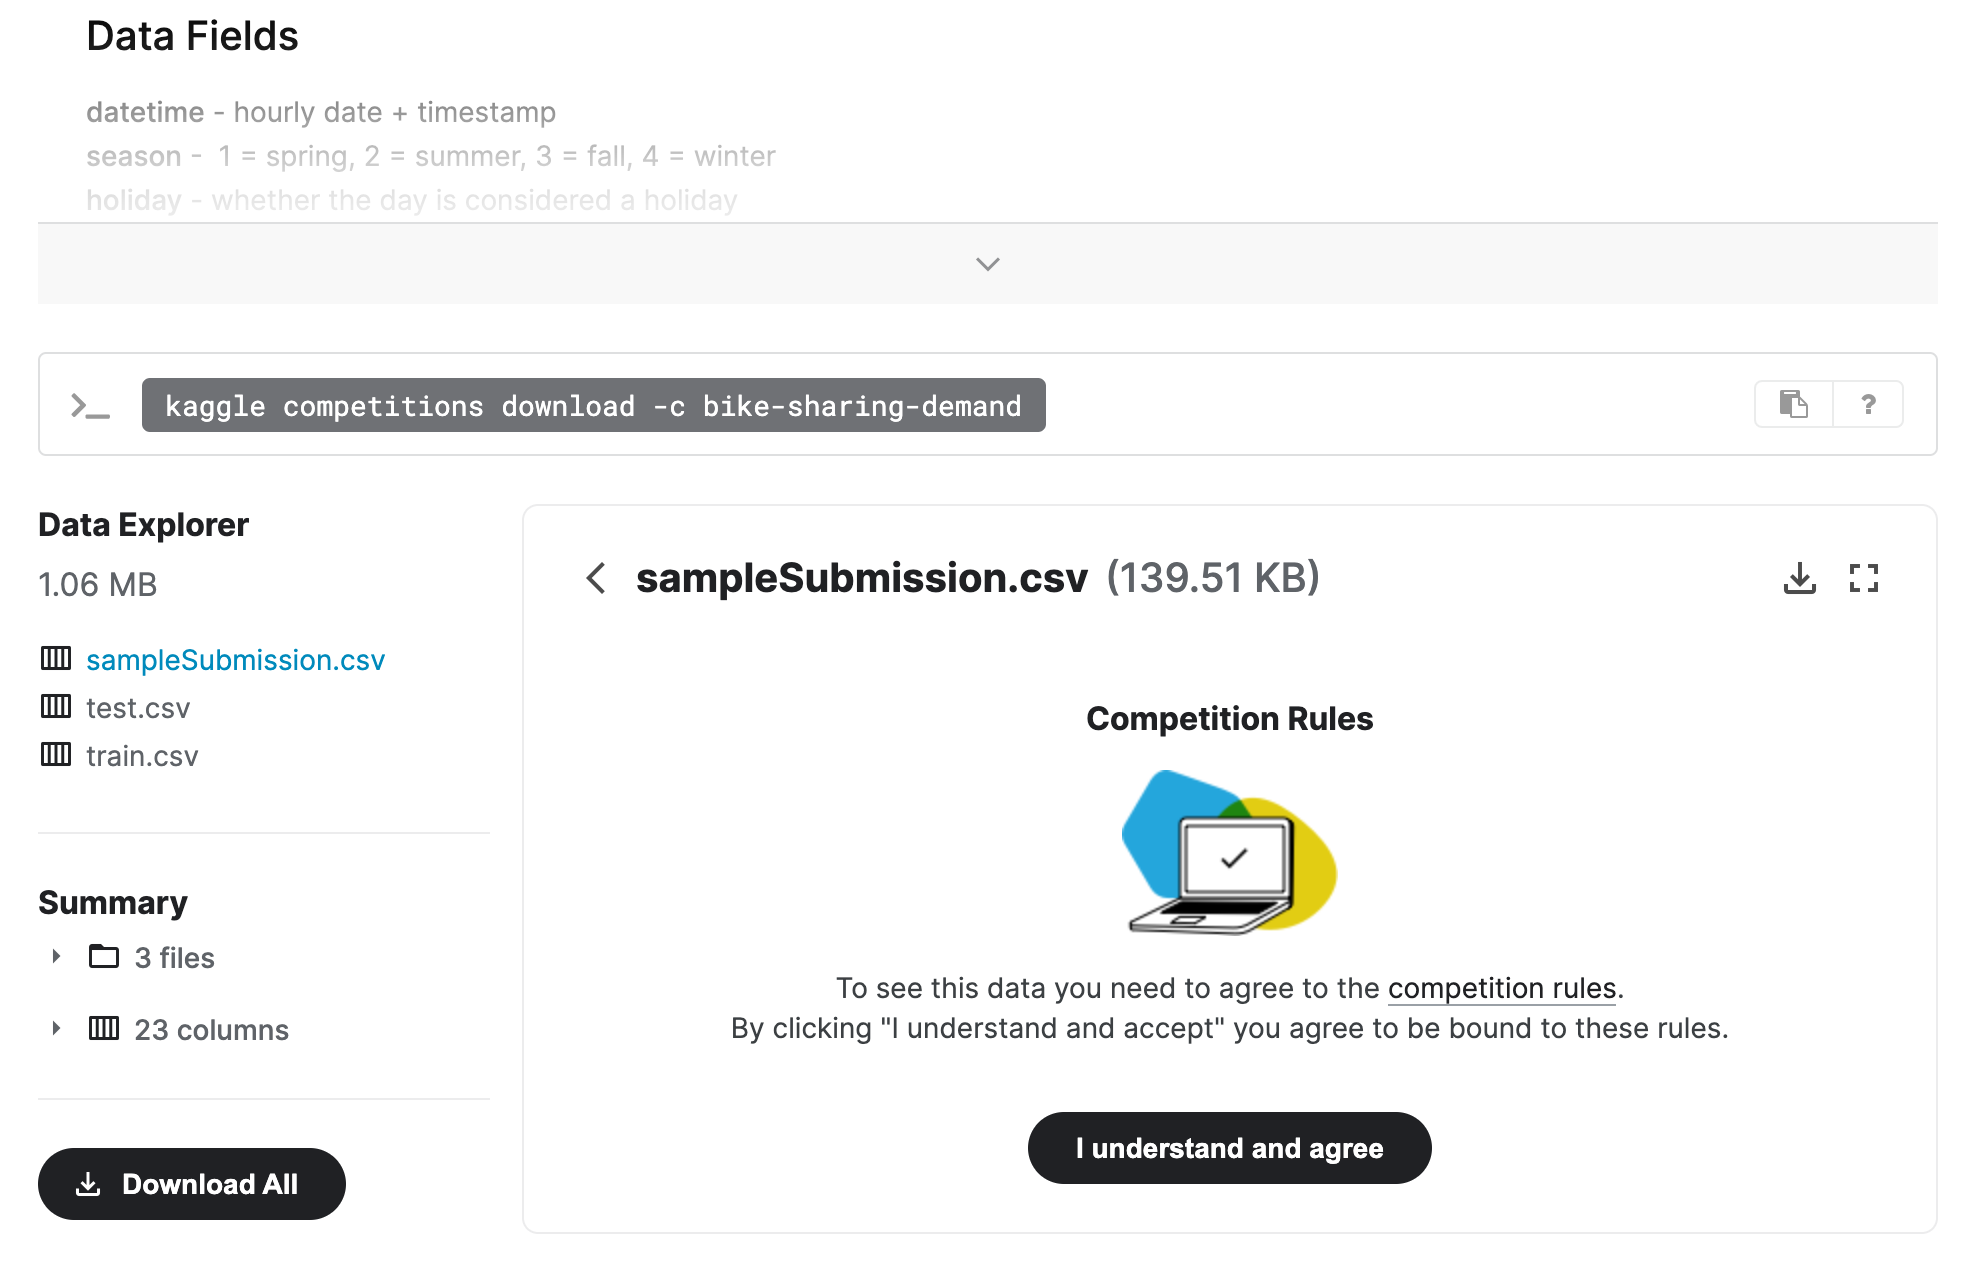

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [178]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [5]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [179]:
#Drop the non-used columns and train the first model 
df = train.drop(columns=['casual', 'registered'])
predictor = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=df,
    time_limit=60,
    presets="best_quality",
     
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211211_105451\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20211211_105451\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3251.59 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column val

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844


	Ran out of time, early stopping on iteration 5236. Best iteration is:
	[4548]	train_set's rmse: 109.8	valid_set's rmse: 126.745
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.1	 = Validation score   (root_mean_squared_error)
	26.3s	 = Training   runtime
	1.8s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 8.73s of the 28.69s of remaining time.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\si

### Review AutoGluon's training run with ranking of models that did the best.

In [18]:
#Show a summary of the Predictor
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -116.525819       4.917321  46.685643                0.000999           0.215887            3       True         10
1       LightGBMXT_BAG_L2 -116.828497       4.429621  36.058200                0.171920           5.642719            2       True          7
2         LightGBM_BAG_L2 -117.254132       4.334635  34.243237                0.076935           3.827757            2       True          8
3  RandomForestMSE_BAG_L1 -118.456660       0.323833   2.730428                0.323833           2.730428            1       True          4
4     WeightedEnsemble_L2 -118.456660       0.324832   3.041250                0.000999           0.310822            2       True          6
5  RandomForestMSE_BAG_L2 -120.029292       4.667467  36.999279                0.40976

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -160.4130779463501,
  'KNeighborsDist_BAG_L1': -169.55209635208928,
  'LightGBMXT_BAG_L1': -134.08833420116997,
  'RandomForestMSE_BAG_L1': -118.45666016795705,
  'ExtraTreesMSE_BAG_L1': -128.7334450621692,
  'WeightedEnsemble_L2': -118.45666016795705,
  'LightGBMXT_BAG_L2': -116.82849711714496,
  'LightGBM_BAG_L2': -117.25413238595938,
  'RandomForestMSE_BAG_L2': -120.02929221036626,
  'WeightedEnsemble_L3':

In [8]:
#Summary of the top predictor scores 
predictor.leaderboard(df, silent=True)

model  score_test   score_val  pred_time_test  \
0  RandomForestMSE_BAG_L1  -43.634011 -118.456660        0.632069   
1     WeightedEnsemble_L2  -43.634011 -118.456660        0.640065   
2         LightGBM_BAG_L2  -64.027416 -117.571913       18.166591   
3     WeightedEnsemble_L3  -64.217731 -117.101612       19.020701   
4       LightGBMXT_BAG_L2  -65.338738 -117.536940       18.693117   
5  RandomForestMSE_BAG_L2  -65.391408 -120.872583       18.446479   
6   KNeighborsDist_BAG_L1  -68.114477 -169.552096        0.131080   
7         LightGBM_BAG_L1 -102.898965 -132.344251        1.797965   
8       LightGBMXT_BAG_L1 -116.342281 -134.100042       15.162717   
9   KNeighborsUnif_BAG_L1 -130.801229 -160.413078        0.122945   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.350819   2.670399                 0.632069                0.350819   
1       0.351823   2.990219                 0.007997                0.001004   
2       2.978304  39.001745                 0.319816                0.056966   
3       3.112224  44.428629                 0.007769                0.000000   
4       3.055258  40.691769                 0.846342                0.133920   
5       3.348073  41.980420                 0.599704                0.426736   
6       0.112583   0.044974                 0.131080                0.112583   
7       0.213881   7.078919                 1.797965                0.213881   
8       2.131772  25.636512                15.162717                2.131772   
9       0.112283   0.046972                 0.122945                0.112283   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           2.670399            1       True          5  
1           0.319819            2       True          6  
2           3.523970            2       True          8  
3           0.212890            3       True         10  
4           5.213994            2       True          7  
5           6.502644            2       True          9  
6           0.044974            1       True          2  
7           7.078919            1       True          4  
8          25.636512            1       True          3  
9           0.046972            1       True          1

In [20]:
#Show the features' importance scores 
predictor.feature_importance(data=df)

Computing feature importance via permutation shuffling for 9 features using 1000 rows with 3 shuffle sets...
	173.03s	= Expected runtime (57.68s per shuffle set)
	109.93s	= Actual runtime (Completed 3 of 3 shuffle sets)


importance    stddev   p_value  n    p99_high     p99_low
datetime    114.578957  2.056792  0.000054  3  126.364603  102.793312
humidity     85.476958  4.246491  0.000411  3  109.809820   61.144096
atemp        80.665268  3.179611  0.000259  3   98.884790   62.445746
temp         47.347653  1.602999  0.000191  3   56.533016   38.162289
windspeed    30.944962  4.054998  0.002838  3   54.180549    7.709375
workingday   15.309436  2.559048  0.004593  3   29.973063    0.645810
weather      10.638480  1.189232  0.002070  3   17.452911    3.824049
holiday       0.743894  0.076601  0.001758  3    1.182825    0.304963
season        0.543100  1.316102  0.274467  3    8.084510   -6.998310

### Create predictions from test dataset

In [10]:
#Create prediction 
predictions = predictor.predict(test)
predictions.head()

0    100.086792
1     88.135239
2     88.135239
3    116.114746
4    116.114746
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [11]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      209.554092
std       124.452072
min        15.967967
25%       109.388290
50%       195.461670
75%       288.361084
max       628.322876
Name: count, dtype: float64

In [12]:
# How many negative values do we have?
(predictions < 0).values.any()

False

In [13]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [14]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [15]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:00<00:05, 38.1kB/s]
 49%|####9     | 96.0k/195k [00:00<00:00, 373kB/s] 
100%|##########| 195k/195k [00:00<00:00, 583kB/s] 
100%|##########| 195k/195k [00:02<00:00, 94.1kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [16]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName                       date                 description                                   status    publicScore  privateScore  
-----------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission.csv                 2021-12-08 11:13:27  first raw submission                          complete  1.38952      1.38952       
submission_new_hpo.csv         2021-12-08 11:06:33  new features with hyperparameters Tune        complete  0.48748      0.48748       
submission_new_hpo.csv         2021-12-08 09:14:10  new features with hyperparameters Tune        complete  0.51858      0.51858       
submission_new_hpo_ensV4.csv   2021-12-07 15:02:09  new features with hyperparameters Vקרדןםמ 4   complete  0.48961      0.48961       
submission_new_hpo.csv         2021-12-07 14:29:38  new features with hyperparameters Tune        complete  0.48338      0.48338       
submission_new_featuresV3.csv  2021-12-07 14:00:

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


#### Initial score of  1.39183

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [6]:
import matplotlib.pyplot as plt
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis

#Select all features (Except date)
features = train.columns
features = features.drop('datetime')

fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs = axs.flatten()
ax_idx = 0

#Iterate over the features, and plot Histogram of all features and the target
for items in features : 
    ax = train[items].plot(kind = "hist",figsize=(10, 10),color='blue',fontsize = 7,bins=25,ax=axs[ax_idx])
    ax.set_facecolor('white')
    ax.set_title(items, fontdict={'fontsize': 12, 'fontweight': 'medium'})
    ax.legend(fontsize = 12)
    ax_idx += 1
     
        
ax=axs[11]
ax.axis('off')   
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 12 Axes>

(0.0, 1.0, 0.0, 1.0)

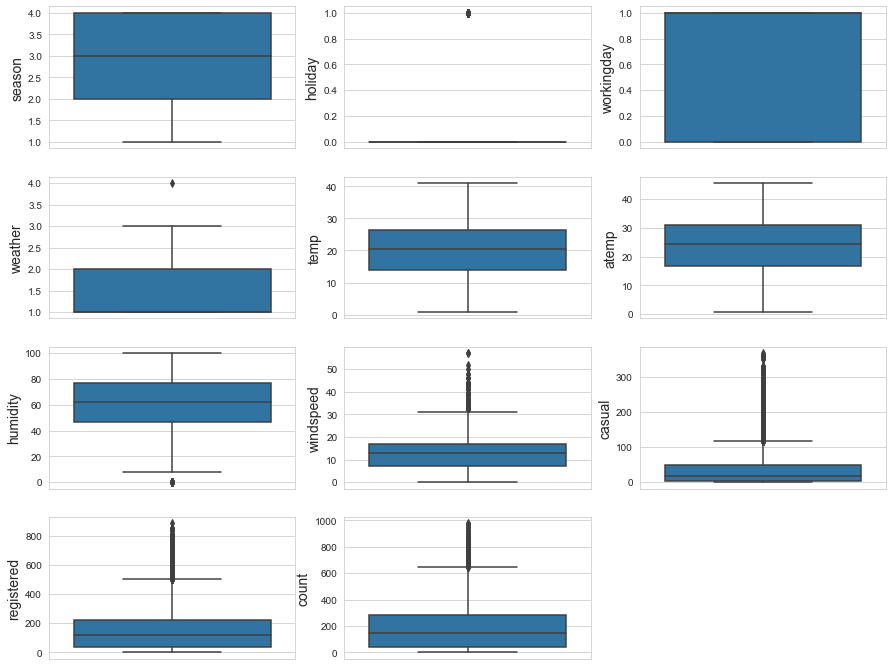

In [7]:
#BoxPlot is another way to show distribution and also check for outliers 

import seaborn as sns
sns.set_style("whitegrid")

fig, axs = plt.subplots(4, 3, figsize=(15, 12))
axs = axs.flatten()
ax_idx = 0


for items in features : 
    boxplot = sns.boxplot(y = items ,data = train ,ax = axs[ax_idx])
    boxplot.set_ylabel(items, fontsize=14)
    ax_idx +=1 
    
ax=axs[11]
ax.axis('off')   

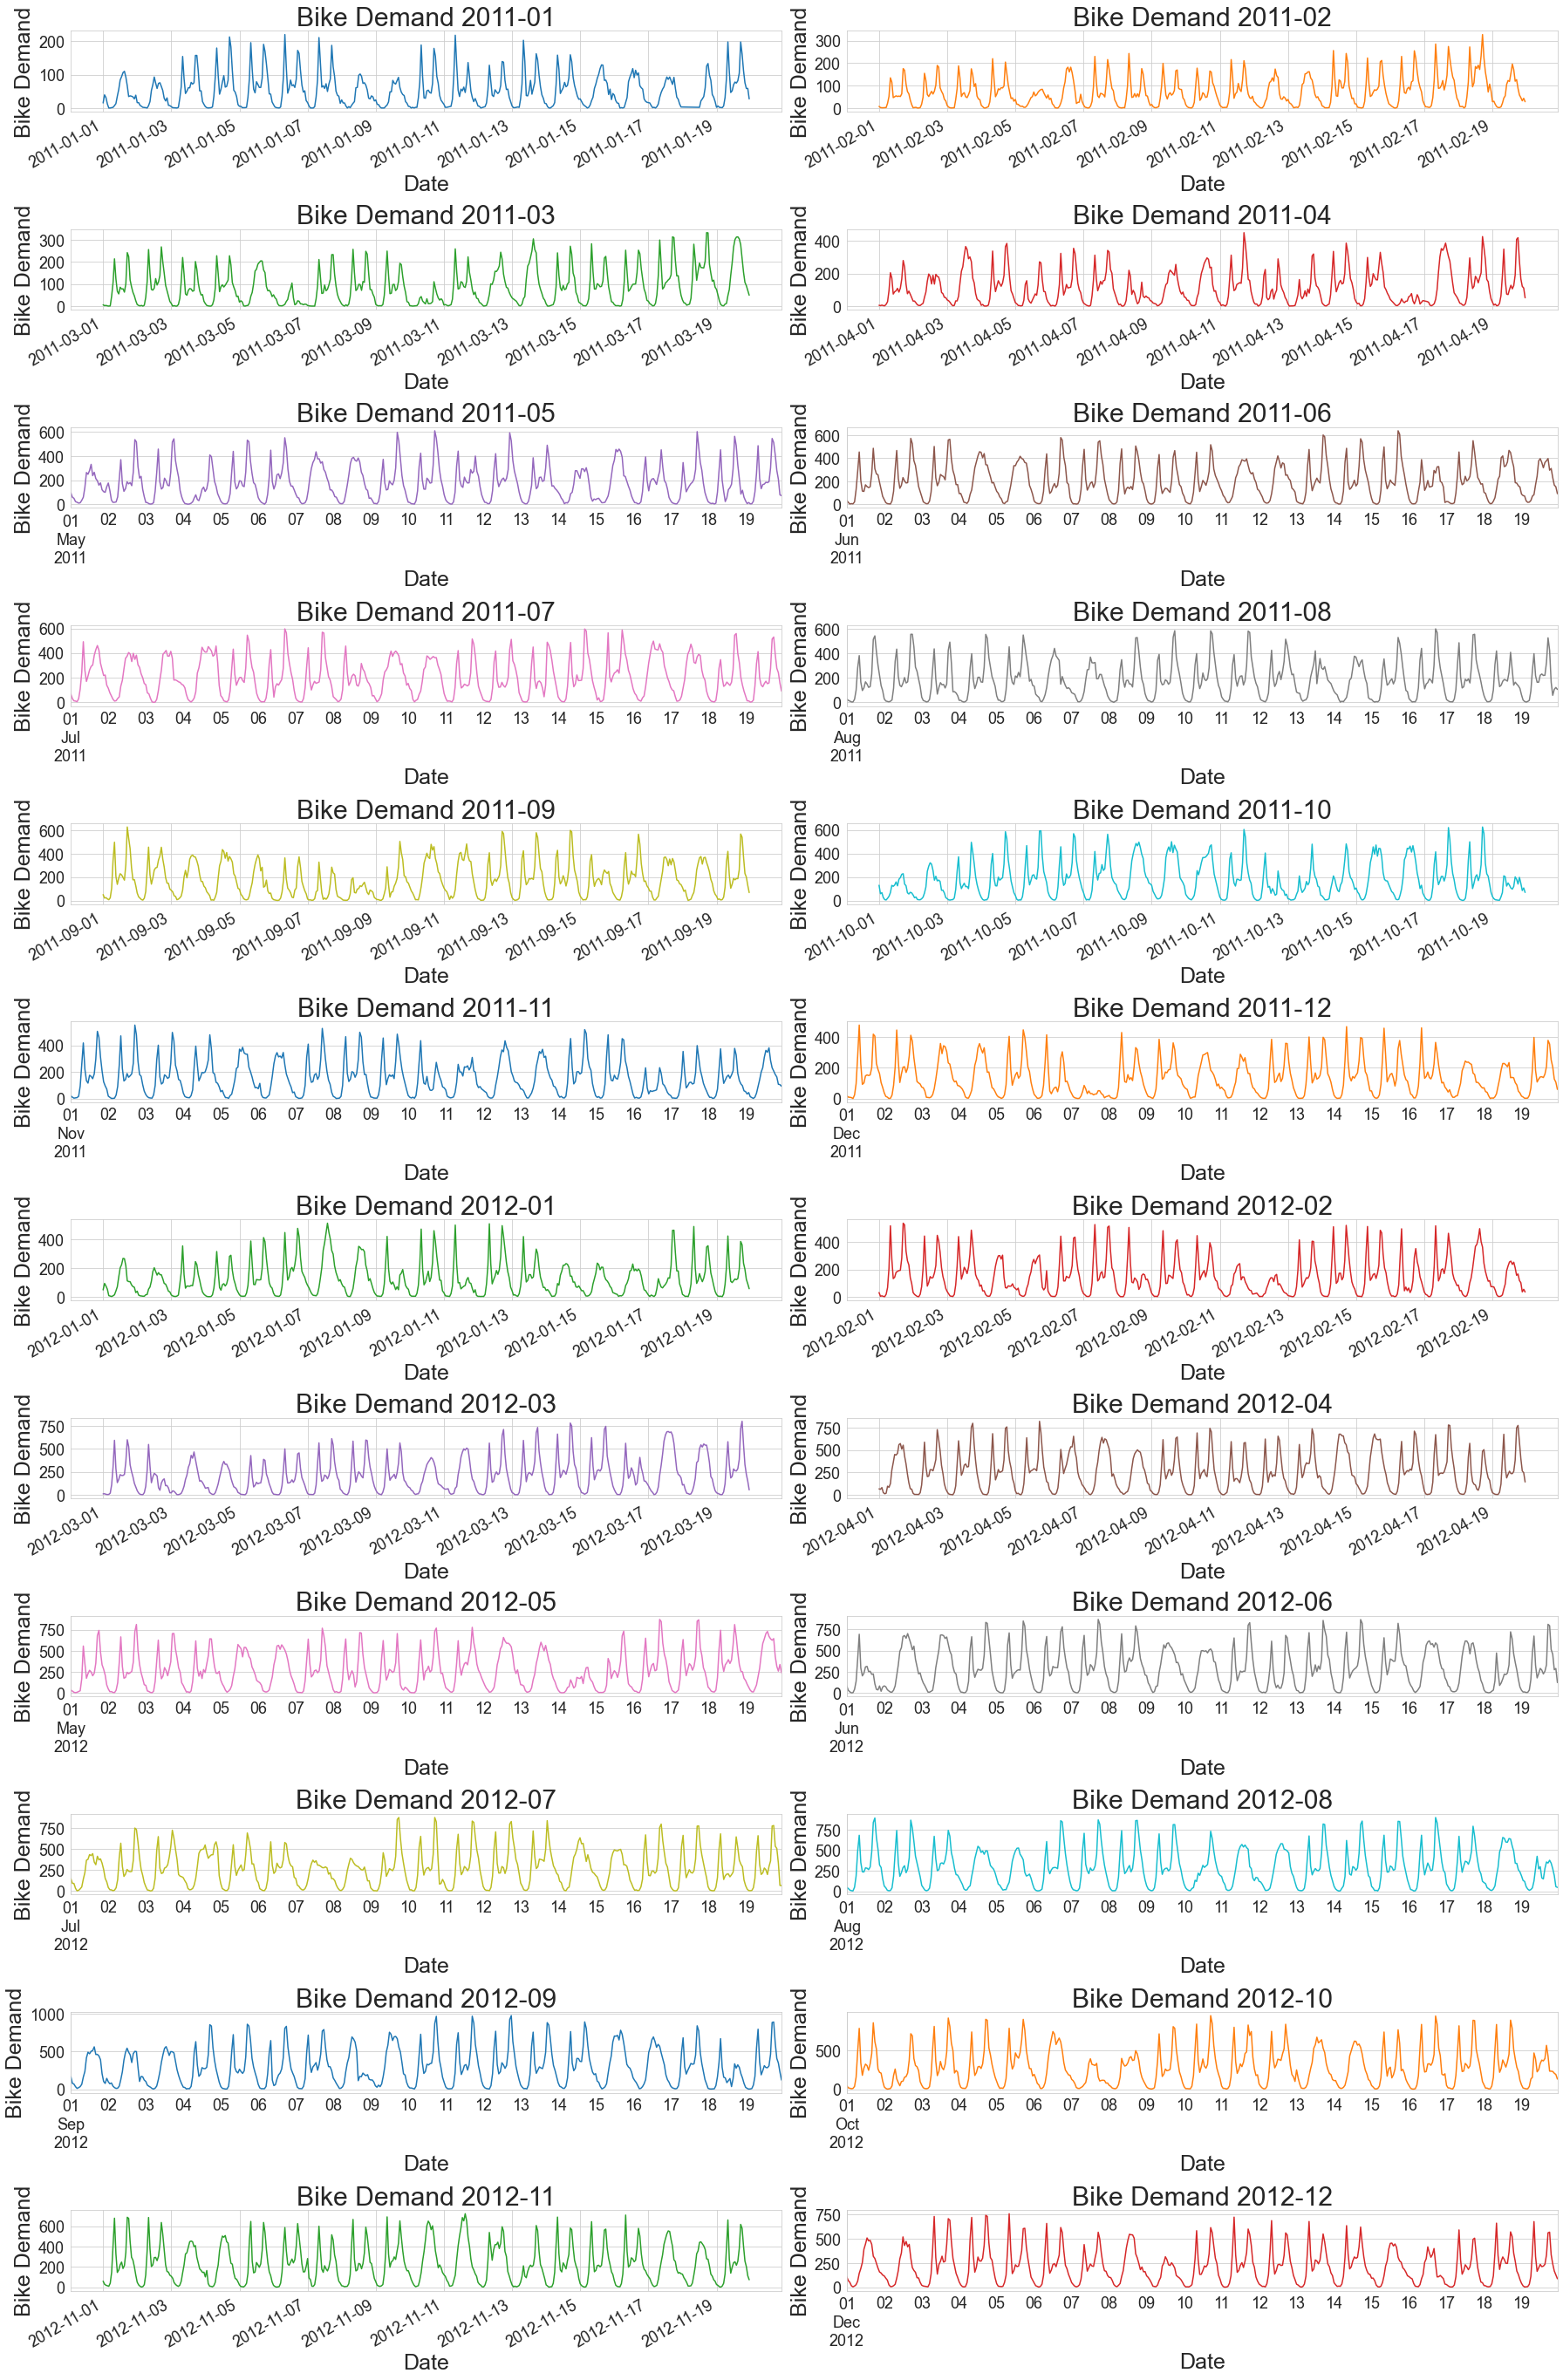

In [8]:
#display Time series data of the count (demand ) 
# Check each Month and look for patterns 
from itertools import cycle

#Create  a date column
train ['date'] = pd.to_datetime(train['datetime'], errors='coerce')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
Months = pd.date_range(start = '2011-01', end = '2012-12').to_period('M').unique()


fig, axs = plt.subplots(12, 2, figsize=(10, 25))
axs = axs.flatten()
ax_idx = 0
for item in Months:
        
        #Slice The Data for only January 2011
        mask = (train ['date'].dt.to_period('M') == pd.to_datetime(item.strftime('%Y-%m')).to_period('M')) 
        
        
        #Visualize the demand for January 2011
        demnad_data = train.loc[mask]
        demnad_data = pd.DataFrame(demnad_data[['count','date']])
        demnad_data.index = demnad_data['date']
        
        ax = demnad_data['count'].plot(figsize=(25, 38),color=next(color_cycle),fontsize = 18,ax=axs[ax_idx])
        ax.set_facecolor('white')
        ax.set_xlabel("Date",size=25)
        ax.set_ylabel("Bike Demand",size=25)
        ax.set_title('Bike Demand '+item.strftime('%Y-%m'), fontdict={'fontsize': 30, 'fontweight': 'medium'})
        
        
        ax_idx += 1
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Bike Demand')

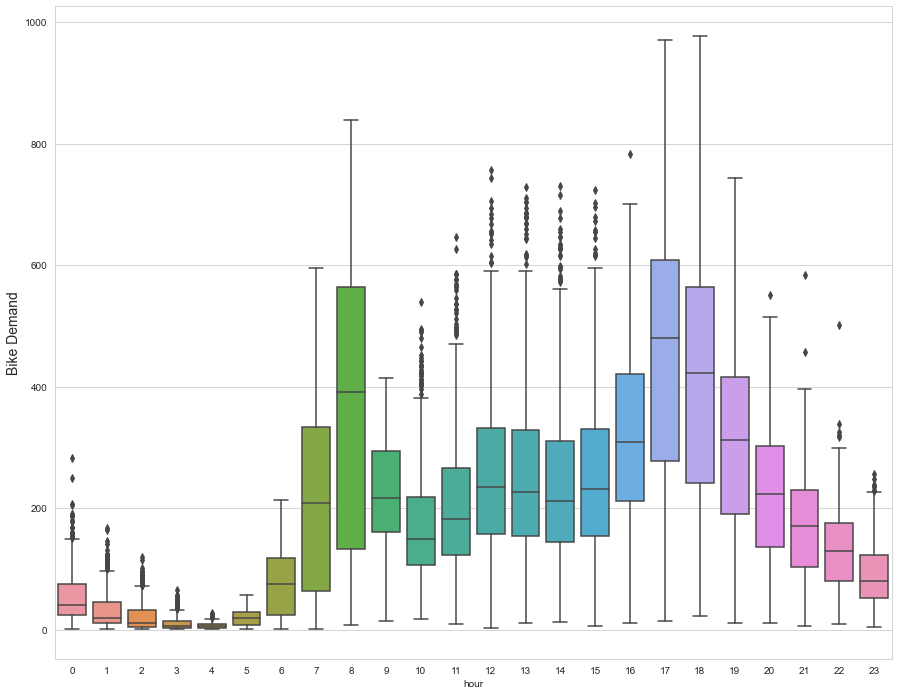

In [9]:
#Visualize the Hourly distribution of the demand (Boxplot)
train['hour'] = train['date'].dt.hour
plt.figure(figsize=(15,12))
boxplot = sns.boxplot(y = 'count', x = 'hour'  ,data = train )
boxplot.set_ylabel("Bike Demand", fontsize=14)

In [10]:
# create a new feature - First round 
train ['date'] = pd.to_datetime(train['datetime'], errors='coerce')
test ['date'] = pd.to_datetime(test['datetime'], errors='coerce')
train['hour'] = train['date'].dt.hour
test['hour'] = test['date'].dt.hour
train['weekday'] = train['date'].dt.weekday
test['weekday'] = test['date'].dt.weekday
train['day'] = train['date'].dt.day
test['day'] = test['date'].dt.day
train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count                date  hour  \
0        81        0.0       3          13     16 2011-01-01 00:00:00     0   
1        80        0.0       8          32     40 2011-01-01 01:00:00     1   
2        80        0.0       5          27     32 2011-01-01 02:00:00     2   
3        75        0.0       3          10     13 2011-01-01 03:00:00     3   
4        75        0.0       0           1      1 2011-01-01 04:00:00     4   

   weekday  day  month  
0        5    1      1  
1        5    1      1  
2        5    1      1  
3        5    1      1  
4        5    1      1

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [11]:
categorical_features = ["hour","day","month","season","weather","holiday","workingday","weekday"]
for items in categorical_features:
    train[items] = train[items].astype("category")
    test[items] = test[items].astype("category")
    


In [12]:
# View the  new feature
train.head()

datetime season holiday workingday weather  temp   atemp  \
0  2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1  2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2  2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3  2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4  2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count                date hour  \
0        81        0.0       3          13     16 2011-01-01 00:00:00    0   
1        80        0.0       8          32     40 2011-01-01 01:00:00    1   
2        80        0.0       5          27     32 2011-01-01 02:00:00    2   
3        75        0.0       3          10     13 2011-01-01 03:00:00    3   
4        75        0.0       0           1      1 2011-01-01 04:00:00    4   

  weekday day month  
0       5   1     1  
1       5   1     1  
2       5   1     1  
3       5   1     1  
4       5   1     1

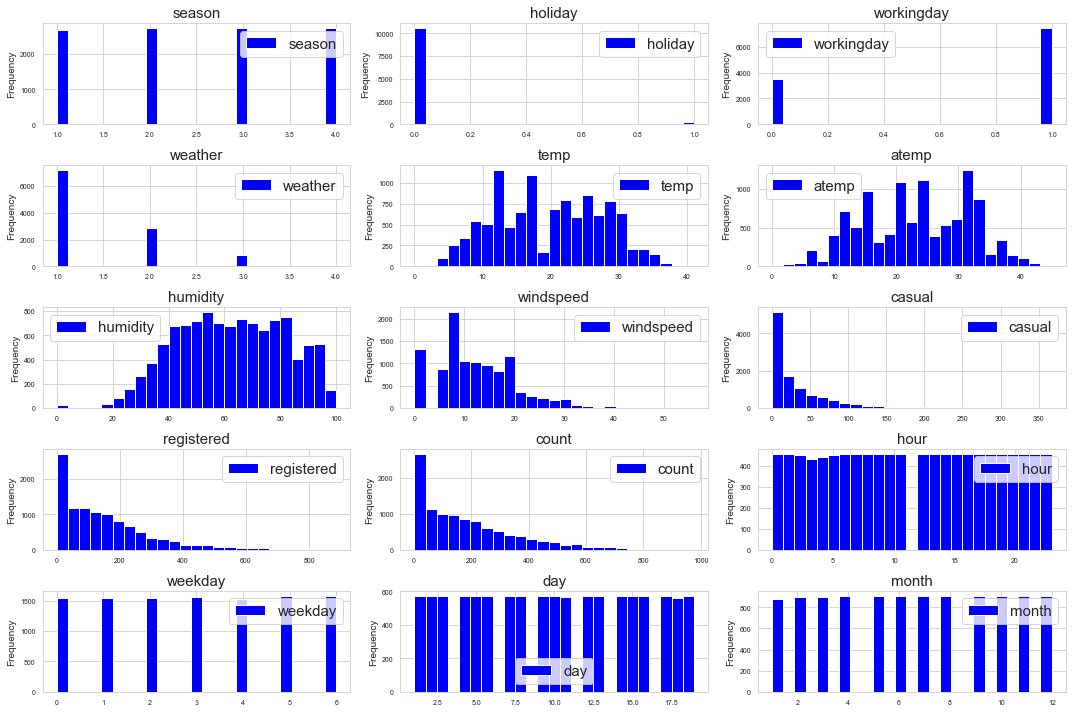

In [13]:
# View histogram of all features again now with the hour feature
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis

#Select all features (Except date)
features = train.columns
features = features.drop(['datetime','date'])


fig, axs = plt.subplots(5, 3, figsize=(25, 25))
axs = axs.flatten()
ax_idx = 0

#Iterate over the features, and plot Histogram of all features and the target
for items in features : 
     
    ax = train[items].astype('int').plot(kind = "hist",figsize=(15, 10),color='blue',fontsize = 7,bins=25,ax=axs[ax_idx])
    ax.set_facecolor('white')
    ax.set_title(items, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    ax.legend(fontsize = 15)
    ax_idx += 1
     
        
 
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [15]:
df = train.drop(columns=['casual', 'registered'])



predictor_new_features = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=df,
    time_limit=60,
    presets="best_quality"
)



No path specified. Models will be saved in: "AutogluonModels/ag-20211210_084101\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20211210_084101\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1953.09 MB
	Train Data (Original)  Memory Usage: 2.03 MB (0.1% of available memory)
	Inferring data type of each feature based on column va

[1000]	train_set's rmse: 20.0349	valid_set's rmse: 33.0906


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.0109	valid_set's rmse: 37.3011
[2000]	train_set's rmse: 14.346	valid_set's rmse: 36.4372


	Ran out of time, early stopping on iteration 2628. Best iteration is:
	[2622]	train_set's rmse: 12.0628	valid_set's rmse: 36.2657
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.9945	valid_set's rmse: 30.9504


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.8095	valid_set's rmse: 36.08
[2000]	train_set's rmse: 14.2079	valid_set's rmse: 35.7043


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.9756	valid_set's rmse: 35.7323
[2000]	train_set's rmse: 14.2133	valid_set's rmse: 35.0161


	Ran out of time, early stopping on iteration 3105. Best iteration is:
	[3104]	train_set's rmse: 10.5517	valid_set's rmse: 34.7049


[3000]	train_set's rmse: 10.8298	valid_set's rmse: 34.7197


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.7593	valid_set's rmse: 37.451
[2000]	train_set's rmse: 14.2066	valid_set's rmse: 37.1562


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.0367	valid_set's rmse: 33.9869
[2000]	train_set's rmse: 14.292	valid_set's rmse: 33.5375


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.0505	valid_set's rmse: 37.3398
[2000]	train_set's rmse: 14.4084	valid_set's rmse: 36.7304
[3000]	train_set's rmse: 11.0132	valid_set's rmse: 36.5665
[4000]	train_set's rmse: 8.66953	valid_set's rmse: 36.4833


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-34.5022	 = Validation score   (root_mean_squared_error)
	25.54s	 = Training   runtime
	1.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 10.82s of the 30.75s of remaining time.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 4

In [26]:
predictor_new_features.leaderboard(df, silent=True)

model  score_test   score_val  pred_time_test  \
0         LightGBM_BAG_L2  -13.931066  -34.063639       14.252502   
1     WeightedEnsemble_L3  -13.955036  -33.816883       16.325964   
2    ExtraTreesMSE_BAG_L1  -13.963567  -37.907656        0.606763   
3  RandomForestMSE_BAG_L1  -14.159395  -38.415614        0.677047   
4     WeightedEnsemble_L2  -14.780175  -33.598879       13.402286   
5       LightGBMXT_BAG_L2  -14.891751  -35.081237       14.948757   
6  RandomForestMSE_BAG_L2  -15.514304  -34.479085       14.415409   
7       LightGBMXT_BAG_L1  -16.404830  -34.479591       12.109479   
8   KNeighborsDist_BAG_L1 -107.626155 -179.133407        0.130545   
9   KNeighborsUnif_BAG_L1 -136.323106 -164.889972        0.126014   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       2.407869  36.289093                 0.602653                0.148915   
1       3.124473  51.073545                 0.008994                0.000999   
2       0.410764   1.959871                 0.606763                0.410764   
3       0.383782   4.031678                 0.677047                0.383782   
4       2.032838  32.200451                 0.008996                0.000000   
5       2.485825  38.539795                 1.298908                0.226870   
6       2.747689  39.915977                 0.765560                0.488734   
7       1.238292  25.890086                12.109479                1.238292   
8       0.112663   0.032980                 0.130545                0.112663   
9       0.113454   0.032980                 0.126014                0.113454   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           4.341497            2       True          8  
1           0.223871            3       True         10  
2           1.959871            1       True          5  
3           4.031678            1       True          4  
4           0.318815            2       True          6  
5           6.592200            2       True          7  
6           7.968381            2       True          9  
7          25.890086            1       True          3  
8           0.032980            1       True          2  
9           0.032980            1       True          1

In [28]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -33.593303       2.129800  33.573897                0.000000           0.338801            2       True          6
1     WeightedEnsemble_L3  -33.749492       3.340071  54.996199                0.000999           0.243859            3       True         10
2         LightGBM_BAG_L2  -33.994852       2.489593  37.692526                0.132922           4.387472            2       True          8
3       LightGBMXT_BAG_L1  -34.475003       1.423190  26.853534                1.423190          26.853534            1       True          3
4  RandomForestMSE_BAG_L2  -34.500057       2.986277  42.472419                0.629606           9.167365            2       True          9
5       LightGBMXT_BAG_L2  -34.905302       2.576544  41.197504                0.21987

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -164.8899720329543,
  'KNeighborsDist_BAG_L1': -179.13340722310159,
  'LightGBMXT_BAG_L1': -34.475002742310096,
  'RandomForestMSE_BAG_L1': -38.41561355866655,
  'ExtraTreesMSE_BAG_L1': -37.90765646612652,
  'WeightedEnsemble_L2': -33.59330256328244,
  'LightGBMXT_BAG_L2': -34.90530180594752,
  'LightGBM_BAG_L2': -33.99485199077562,
  'RandomForestMSE_BAG_L2': -34.50005694220576,
  'WeightedEnsemble_L3': -33.

In [29]:
predictor_new_features.feature_importance(data=df)

Computing feature importance via permutation shuffling for 14 features using 1000 rows with 3 shuffle sets...
	114.66s	= Expected runtime (38.22s per shuffle set)
	59.56s	= Actual runtime (Completed 3 of 3 shuffle sets)


importance    stddev   p_value  n    p99_high     p99_low
hour        197.170591  3.534212  0.000054  3  217.422016  176.919166
workingday   67.957786  2.856578  0.000294  3   84.326298   51.589275
date         34.485488  2.689452  0.001011  3   49.896344   19.074632
datetime     33.603976  2.187511  0.000705  3   46.138653   21.069298
weekday      22.583808  0.668894  0.000146  3   26.416645   18.750971
humidity     22.122182  0.923877  0.000290  3   27.416100   16.828264
temp         17.940420  0.912210  0.000430  3   23.167483   12.713358
atemp        16.174898  1.225393  0.000954  3   23.196534    9.153262
weather      15.634848  1.741819  0.002056  3   25.615663    5.654032
month        10.988939  0.464586  0.000298  3   13.651070    8.326809
day          10.826542  0.547731  0.000426  3   13.965101    7.687983
season        2.900745  0.341267  0.002291  3    4.856245    0.945246
windspeed     2.874331  0.242800  0.001185  3    4.265599    1.483063
holiday       1.269797  0.357387  0.012702  3    3.317662   -0.778068

In [16]:
# Remember to set all negative values to zero
predictions_nf = predictor_new_features.predict(test)
predictions_nf[predictions_nf<0] = 0

In [30]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_nf
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "NF - Model 1  (Basic  Time Catogricla data )"

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 58.0kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 469kB/s] 
100%|##########| 194k/194k [00:00<00:00, 674kB/s] 
100%|##########| 194k/194k [00:02<00:00, 99.0kB/s]


In [32]:
!kaggle competitions submissions -c bike-sharing-demand  

fileName                       date                 description                                   status    publicScore  privateScore  
-----------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_new_features.csv    2021-12-08 11:24:55  NF - Model 1  (Basic  Time Catogricla data )  complete  0.50674      0.50674       
submission.csv                 2021-12-08 11:13:27  first raw submission                          complete  1.38952      1.38952       
submission_new_hpo.csv         2021-12-08 11:06:33  new features with hyperparameters Tune        complete  0.48748      0.48748       
submission_new_hpo.csv         2021-12-08 09:14:10  new features with hyperparameters Tune        complete  0.51858      0.51858       
submission_new_hpo_ensV4.csv   2021-12-07 15:02:09  new features with hyperparameters Vקרדןםמ 4   complete  0.48961      0.48961       
submission_new_hpo.csv         2021-12-07 14:29:

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [65]:
#WindSpeed and Humidity  do not looks like normal distrbution 
# Try Log transfomiation 
import numpy as np
 

df['humidity']  = np.where(train['humidity'] !=0,np.log(train['humidity']),0)
df['windspeed']  = np.where(train['windspeed'] !=0,np.log(train['windspeed']),0)
test_log = test.copy(deep = True)
test_log['humidity']  = np.where(test['humidity'] !=0,np.log(test['humidity']),0)
test_log['windspeed']  = np.where(test['windspeed'] !=0,np.log(test['windspeed']),0)

predictor_new_features_log = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=df,
    time_limit=60,
    presets="best_quality"
)



C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No path specified. Models will be saved in: "AutogluonModels/ag-20211208_120254\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20211208_120254\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-co

[1000]	train_set's rmse: 20.0349	valid_set's rmse: 33.0906


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.0109	valid_set's rmse: 37.3011
[2000]	train_set's rmse: 14.346	valid_set's rmse: 36.4372
[3000]	train_set's rmse: 10.9277	valid_set's rmse: 36.1671


	Ran out of time, early stopping on iteration 3516. Best iteration is:
	[3413]	train_set's rmse: 9.87616	valid_set's rmse: 36.1206
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.9945	valid_set's rmse: 30.9504


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.8095	valid_set's rmse: 36.0766
[2000]	train_set's rmse: 14.2079	valid_set's rmse: 35.7016


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.9756	valid_set's rmse: 35.7323
[2000]	train_set's rmse: 14.2133	valid_set's rmse: 35.0161
[3000]	train_set's rmse: 10.8298	valid_set's rmse: 34.7197


	Ran out of time, early stopping on iteration 3852. Best iteration is:
	[3845]	train_set's rmse: 8.84069	valid_set's rmse: 34.6166
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.7593	valid_set's rmse: 37.451
[2000]	train_set's rmse: 14.2066	valid_set's rmse: 37.1562


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.0367	valid_set's rmse: 33.9869
[2000]	train_set's rmse: 14.292	valid_set's rmse: 33.5375


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.0505	valid_set's rmse: 37.3398
[2000]	train_set's rmse: 14.4084	valid_set's rmse: 36.7304
[3000]	train_set's rmse: 11.0132	valid_set's rmse: 36.5665
[4000]	train_set's rmse: 8.66953	valid_set's rmse: 36.4833


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-34.4777	 = Validation score   (root_mean_squared_error)
	27.02s	 = Training   runtime
	2.23s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 7.11s of the 27.05s of remaining time.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 41

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002083ACF5518>]],
      dtype=object)

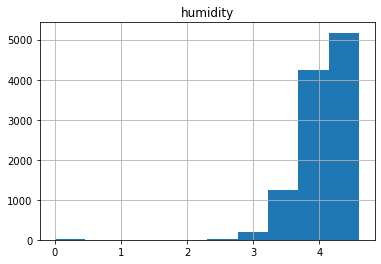

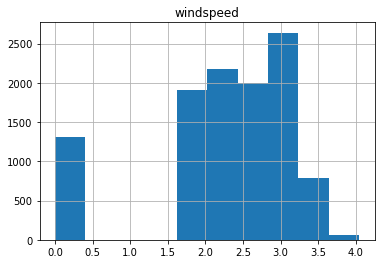

In [66]:
#check the dist after the transformation   
df.hist("humidity")
df.hist("windspeed")

In [67]:
predictor_new_features_log.leaderboard(df, silent=True)

model  score_test   score_val  pred_time_test  \
0     WeightedEnsemble_L3  -13.886557  -33.782797       25.962895   
1         LightGBM_BAG_L2  -14.055400  -33.982358       23.336702   
2    ExtraTreesMSE_BAG_L1  -14.068774  -38.193369        0.622889   
3  RandomForestMSE_BAG_L1  -14.150597  -38.397120        0.547840   
4       LightGBMXT_BAG_L2  -14.526568  -34.948988       24.865172   
5     WeightedEnsemble_L2  -14.772862  -33.615160       22.535855   
6  RandomForestMSE_BAG_L2  -15.663307  -34.615328       23.321068   
7       LightGBMXT_BAG_L1  -16.337520  -34.477709       21.357129   
8   KNeighborsDist_BAG_L1 -107.886008 -179.788349        0.131027   
9   KNeighborsUnif_BAG_L1 -137.078940 -165.401563        0.125135   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       4.207922  54.143911                 0.007994                0.001000   
1       3.356391  38.533814                 0.552681                0.146912   
2       0.375784   1.992852                 0.622889                0.375784   
3       0.378769   4.485416                 0.547840                0.378769   
4       3.519319  41.320181                 2.081151                0.309839   
5       2.983355  33.852499                 0.007997                0.001000   
6       3.750170  41.192347                 0.537048                0.540691   
7       2.227803  27.024433                21.357129                2.227803   
8       0.113635   0.032972                 0.131027                0.113635   
9       0.113488   0.032981                 0.125135                0.113488   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.234878            3       True         10  
1           4.965160            2       True          8  
2           1.992852            1       True          5  
3           4.485416            1       True          4  
4           7.751527            2       True          7  
5           0.349798            2       True          6  
6           7.623692            2       True          9  
7          27.024433            1       True          3  
8           0.032972            1       True          2  
9           0.032981            1       True          1

In [70]:
# Remember to set all negative values to zero
predictions_log = predictor_new_features_log.predict(test_log)
predictions_log[predictions_log<0] = 0

# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_log
submission_new_features.to_csv("submission_new_features_log.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_log.csv -m "NF - Model 2  (Basic  Log Transform )"
!kaggle competitions submissions -c bike-sharing-demand  

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 54.1kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 448kB/s] 
100%|##########| 194k/194k [00:00<00:00, 650kB/s] 
100%|##########| 194k/194k [00:01<00:00, 120kB/s]


fileName                         date                 description                                   status    publicScore  privateScore  
-------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_new_features_log.csv  2021-12-08 12:07:08  NF - Model 2  (Basic  Log Transform )         complete  0.50789      0.50789       
submission_new_features_log.csv  2021-12-08 12:06:06  NF - Model 2  (Basic  Log Transform )         complete  0.50674      0.50674       
submission_new_features_log.csv  2021-12-08 11:34:53  NF - Model 2  (Basic  Log Transform )         complete  0.50674      0.50674       
submission_new_features.csv      2021-12-08 11:24:55  NF - Model 1  (Basic  Time Catogricla data )  complete  0.50674      0.50674       
submission.csv                   2021-12-08 11:13:27  first raw submission                          complete  1.38952      1.38952       
submission_new_hpo.csv           2

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


## Step 5A: Rerun the model with some more advanced features


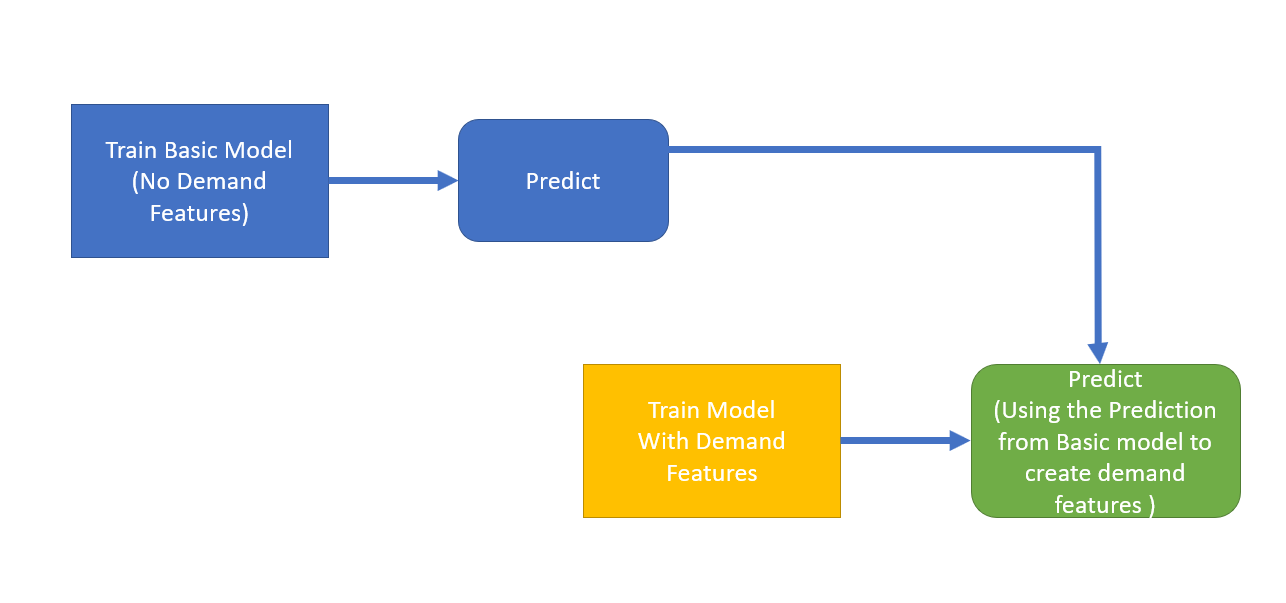


In [17]:
# Add the predictions to test (as count )
# Mark train and test rows to be able to split later on 
#Combine train and test for on data frame , to create the Demand Time series features 
train['data']= 'train'
test['data'] = 'test'
test['count'] = predictions_nf
raw =  pd.concat([train,test])
raw = raw.drop(['casual','registered'],axis=1)


In [18]:
raw.head()

datetime season holiday workingday weather  temp   atemp  \
0  2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1  2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2  2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3  2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4  2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  count                date hour weekday  day month  \
0        81        0.0   16.0 2011-01-01 00:00:00    0       5    1     1   
1        80        0.0   40.0 2011-01-01 01:00:00    1       5    1     1   
2        80        0.0   32.0 2011-01-01 02:00:00    2       5    1     1   
3        75        0.0   13.0 2011-01-01 03:00:00    3       5    1     1   
4        75        0.0    1.0 2011-01-01 04:00:00    4       5    1     1   

    data  
0  train  
1  train  
2  train  
3  train  
4  train

In [19]:
#The first set of Time series features will shift features 

#raw.sort_values(by = ['hour','datetime'],inplace=True)
raw.datetime = pd.to_datetime(raw.datetime)
raw.index = raw.datetime
raw.head()



datetime season holiday workingday weather  \
datetime                                                                    
2011-01-01 00:00:00 2011-01-01 00:00:00      1       0          0       1   
2011-01-01 01:00:00 2011-01-01 01:00:00      1       0          0       1   
2011-01-01 02:00:00 2011-01-01 02:00:00      1       0          0       1   
2011-01-01 03:00:00 2011-01-01 03:00:00      1       0          0       1   
2011-01-01 04:00:00 2011-01-01 04:00:00      1       0          0       1   

                     temp   atemp  humidity  windspeed  count  \
datetime                                                        
2011-01-01 00:00:00  9.84  14.395        81        0.0   16.0   
2011-01-01 01:00:00  9.02  13.635        80        0.0   40.0   
2011-01-01 02:00:00  9.02  13.635        80        0.0   32.0   
2011-01-01 03:00:00  9.84  14.395        75        0.0   13.0   
2011-01-01 04:00:00  9.84  14.395        75        0.0    1.0   

                                   date hour weekday  day month   data  
datetime                                                                
2011-01-01 00:00:00 2011-01-01 00:00:00    0       5    1     1  train  
2011-01-01 01:00:00 2011-01-01 01:00:00    1       5    1     1  train  
2011-01-01 02:00:00 2011-01-01 02:00:00    2       5    1     1  train  
2011-01-01 03:00:00 2011-01-01 03:00:00    3       5    1     1  train  
2011-01-01 04:00:00 2011-01-01 04:00:00    4       5    1     1  train

In [20]:
#Shift features 
raw["shift_1"] = raw['count'].shift(1, freq='D')
raw["shift_2"] = raw['count'].shift(1, freq='2D')
raw["shift_7"] = raw['count'].shift(1, freq='7D')
raw["shift_30"] = raw['count'].shift(1, freq='30D')
 
 

## # Visualization - Shift Features 

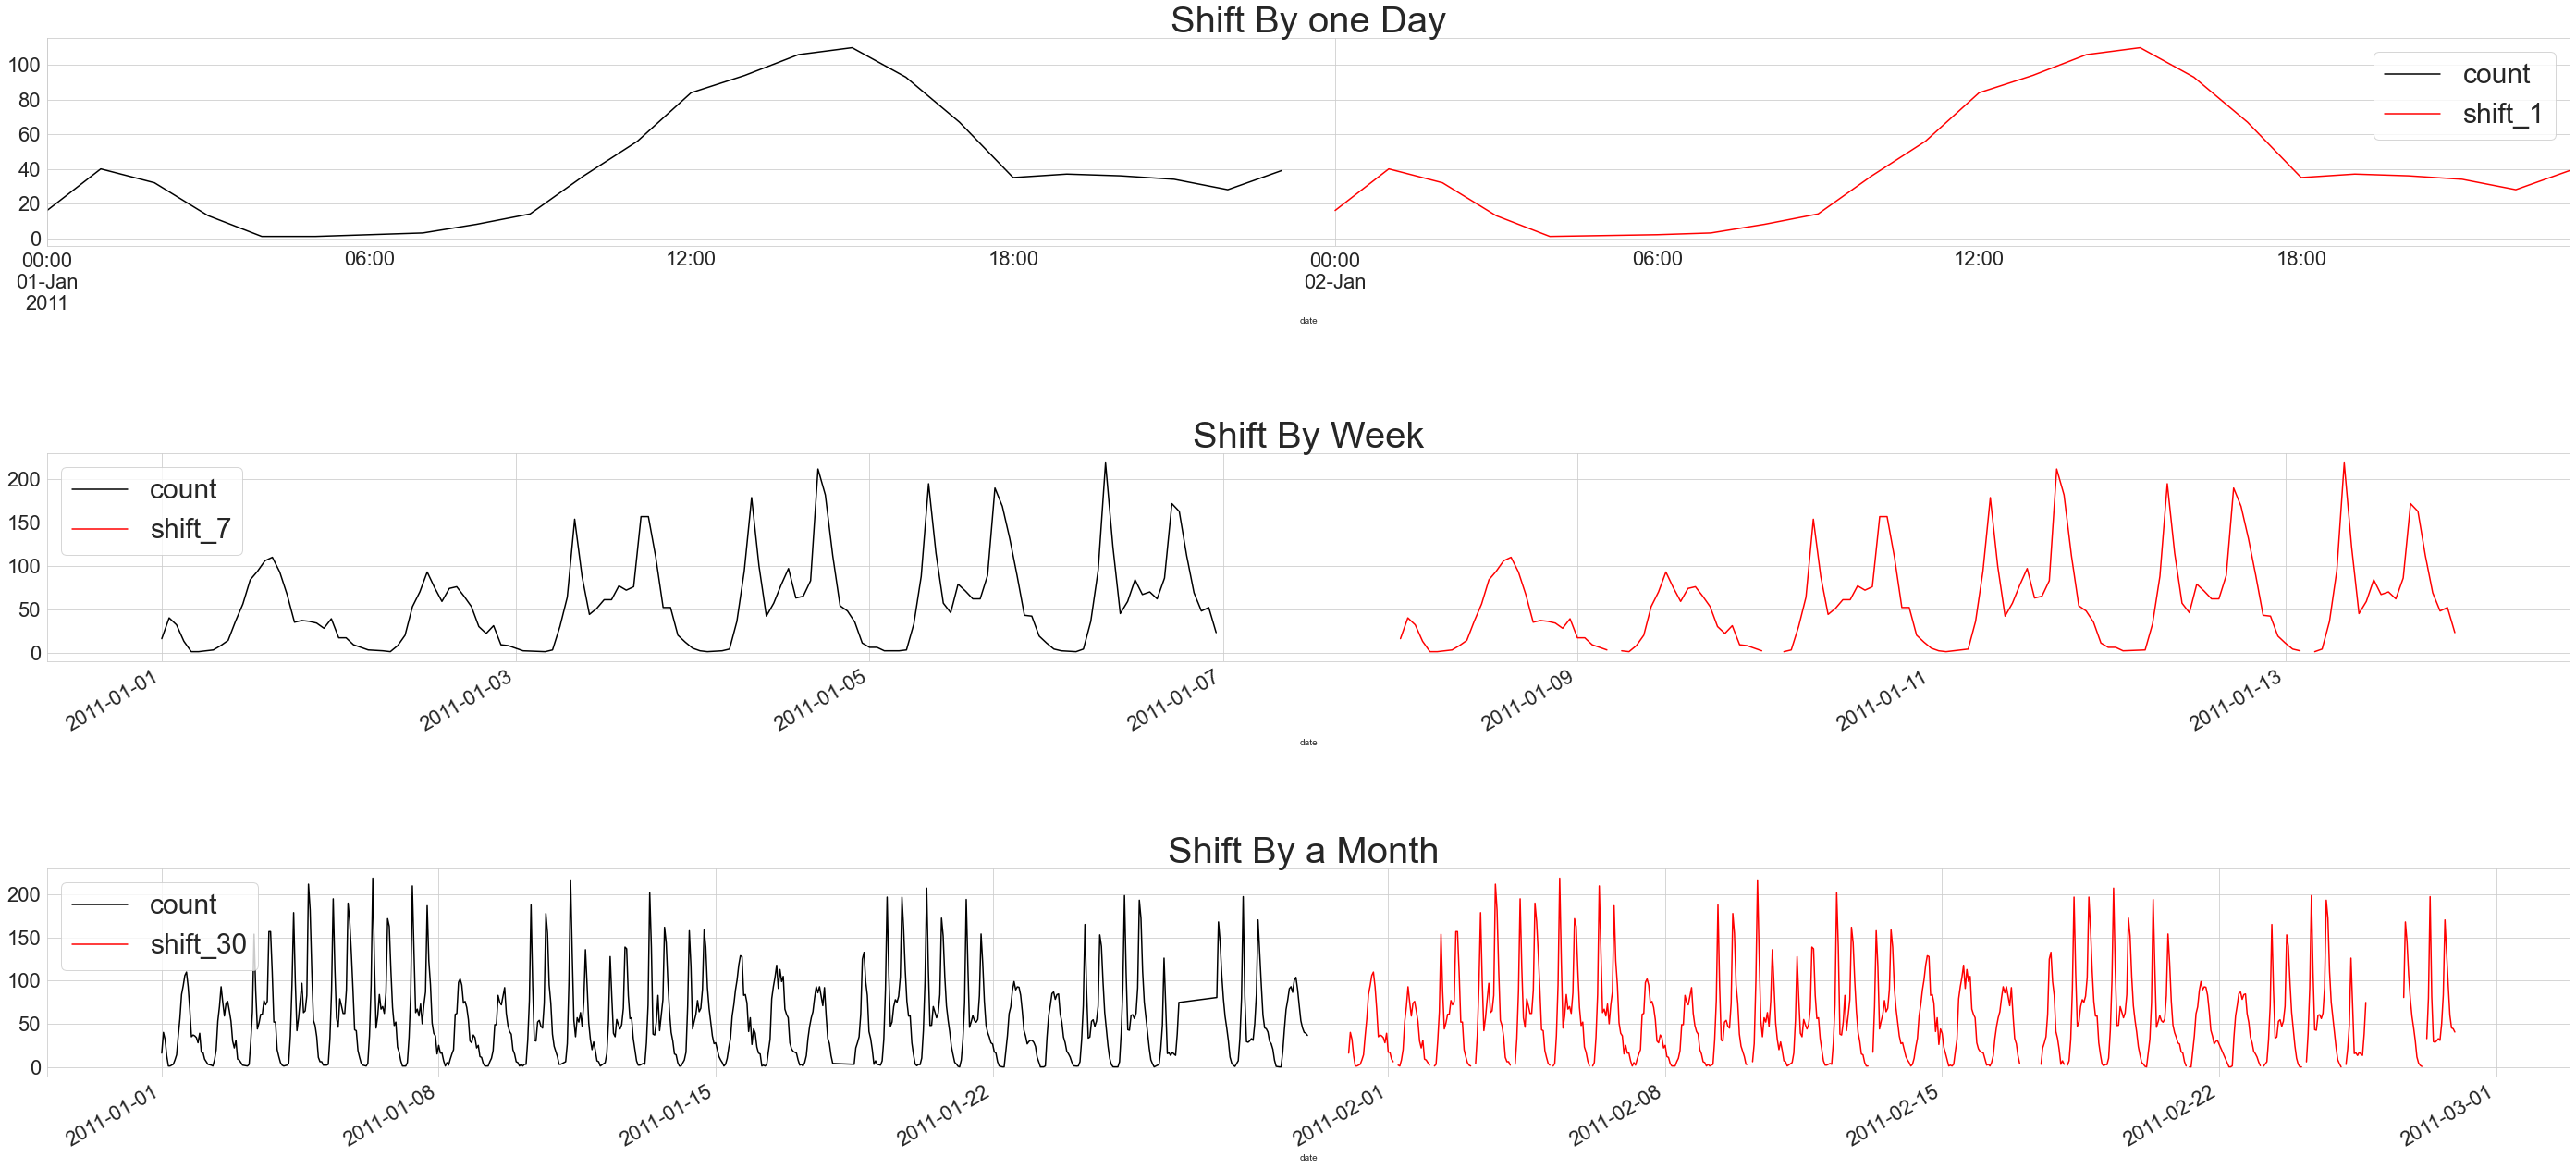

In [21]:
demnad_data = raw[['date','count',"shift_1","shift_2","shift_7","shift_30"]].copy(deep = True)
#demnad_data.reset_index(inplace = True)
demnad_data.sort_values(by = ['date'],inplace=True)
demnad_data.index = demnad_data.date

fig, axs = plt.subplots(3, 1, figsize=(60, 70))
axs = axs.flatten()
ax_idx = 0
fig.tight_layout(pad=10)
fig.subplots_adjust(hspace=1)

#demnad_data.index = demnad_data['date']
#Plot a shifted example to verify the shift 

ax = demnad_data[demnad_data['date']<'2011-01-2']['count'].plot(figsize=(30, 20),fontsize = 22,color = 'black',ax=axs[0])
ax = demnad_data[demnad_data['date']<'2011-01-3']['shift_1'].plot(figsize=(40, 20),fontsize = 22,color = 'red',ax=axs[0])
ax.set_title("Shift By one Day", fontdict={'fontsize': 40, 'fontweight': 'medium'})
ax.legend(fontsize = 30)

ax = demnad_data[demnad_data['date']<'2011-01-7']['count'].plot(figsize=(30, 20),fontsize = 22,color = 'black',ax=axs[1])
ax = demnad_data[demnad_data['date']<'2011-01-14']['shift_7'].plot(figsize=(40, 20),fontsize = 22,color = 'red',ax=axs[1])
ax.set_title("Shift By Week", fontdict={'fontsize': 40, 'fontweight': 'medium'})
ax.legend(fontsize = 30)

ax = demnad_data[demnad_data['date']<'2011-01-30']['count'].plot(figsize=(30, 20),fontsize = 22,color = 'black',ax=axs[2])
ax = demnad_data[demnad_data['date']<'2011-02-28']['shift_30'].plot(figsize=(40, 20),fontsize = 22,color = 'red',ax=axs[2])
ax.set_title("Shift By a Month ", fontdict={'fontsize': 40, 'fontweight': 'medium'})
ax.legend(fontsize = 30)




In [22]:
raw.reset_index(inplace=True,drop=True)
train = raw[raw['data']=='train'].copy(deep=True)
test = raw[raw['data']=='test'].copy(deep=True)
test.reset_index(inplace=True,drop=True)
train.drop(['data'],axis=1,inplace =True)
test.drop(['data'],axis=1,inplace =True)

categorical_features = ["hour","day","month","season","weather","holiday","workingday","weekday"]
for items in categorical_features:
    train[items] = train[items].astype("category")
    test[items] = test[items].astype("category")
    


In [23]:
test.head()

datetime season holiday workingday weather   temp   atemp  \
0 2011-01-20 00:00:00      1       0          1       1  10.66  11.365   
1 2011-01-20 01:00:00      1       0          1       1  10.66  13.635   
2 2011-01-20 02:00:00      1       0          1       1  10.66  13.635   
3 2011-01-20 03:00:00      1       0          1       1  10.66  12.880   
4 2011-01-20 04:00:00      1       0          1       1  10.66  12.880   

   humidity  windspeed      count                date hour weekday day month  \
0        56    26.0027  14.320465 2011-01-20 00:00:00    0       3  20     1   
1        56     0.0000   3.275934 2011-01-20 01:00:00    1       3  20     1   
2        56     0.0000   1.362249 2011-01-20 02:00:00    2       3  20     1   
3        56    11.0014   2.759369 2011-01-20 03:00:00    3       3  20     1   
4        56    11.0014   2.614722 2011-01-20 04:00:00    4       3  20     1   

   shift_1  shift_2  shift_7  shift_30  
0      3.0      NaN      7.0       NaN  
1      7.0      NaN      2.0       NaN  
2      3.0      NaN      2.0       NaN  
3      NaN      NaN      3.0       NaN  
4      2.0      NaN      4.0       NaN

In [90]:
predictor_new_features_advnced1 = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=60,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211208_121656\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20211208_121656\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 18
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4112.71 MB
	Train Data (Original)  Memory Usage: 0.96 MB (0.0% of available memory)
	Inferring data type of each feature based on col

[1000]	train_set's rmse: 18.4735	valid_set's rmse: 33.5858
[2000]	train_set's rmse: 12.2684	valid_set's rmse: 32.9556


	Ran out of time, early stopping on iteration 2350. Best iteration is:
	[2228]	train_set's rmse: 11.3215	valid_set's rmse: 32.865
	Time limit exceeded... Skipping LightGBMXT_BAG_L1.
Fitting model: LightGBM_BAG_L1 ... Training model for up to 34.99s of the 54.85s of remaining time.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.8513	valid_set's rmse: 37.8223


	Ran out of time, early stopping on iteration 1751. Best iteration is:
	[1693]	train_set's rmse: 7.08644	valid_set's rmse: 37.4643
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.8429	valid_set's rmse: 39.953


	Ran out of time, early stopping on iteration 1848. Best iteration is:
	[1678]	train_set's rmse: 7.09089	valid_set's rmse: 39.3845
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.9154	valid_set's rmse: 33.991


	Ran out of time, early stopping on iteration 1756. Best iteration is:
	[1754]	train_set's rmse: 6.73913	valid_set's rmse: 33.6333
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.9578	valid_set's rmse: 38.9479


	Ran out of time, early stopping on iteration 1864. Best iteration is:
	[1840]	train_set's rmse: 6.3337	valid_set's rmse: 38.812
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.8915	valid_set's rmse: 37.7805


	Ran out of time, early stopping on iteration 1951. Best iteration is:
	[1925]	train_set's rmse: 5.99801	valid_set's rmse: 37.3201
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.6245	valid_set's rmse: 43.5617


	Ran out of time, early stopping on iteration 1859. Best iteration is:
	[1803]	train_set's rmse: 6.43973	valid_set's rmse: 43.2256
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.8943	valid_set's rmse: 37.4906


	Ran out of time, early stopping on iteration 1887. Best iteration is:
	[1874]	train_set's rmse: 6.27735	valid_set's rmse: 37.128
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.8519	valid_set's rmse: 36.727


	Ran out of time, early stopping on iteration 2014. Best iteration is:
	[2014]	train_set's rmse: 5.57978	valid_set's rmse: 36.2703


[2000]	train_set's rmse: 5.6272	valid_set's rmse: 36.2716


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 12.0288	valid_set's rmse: 42.357


	Ran out of time, early stopping on iteration 2118. Best iteration is:
	[1852]	train_set's rmse: 6.50221	valid_set's rmse: 41.8659


[2000]	train_set's rmse: 5.91355	valid_set's rmse: 41.8868


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 11.7975	valid_set's rmse: 36.735
[2000]	train_set's rmse: 5.70617	valid_set's rmse: 36.4428


	Ran out of time, early stopping on iteration 2143. Best iteration is:
	[1970]	train_set's rmse: 5.83681	valid_set's rmse: 36.424
	-38.2454	 = Validation score   (root_mean_squared_error)
	31.41s	 = Training   runtime
	1.14s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.58s of the 19.75s of remaining time.
	-38.2454	 = Validation score   (root_mean_squared_error)
	0.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 19.49s of the 19.48s of remaining time.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. 

[1000]	train_set's rmse: 19.3527	valid_set's rmse: 35.9711


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

In [91]:
predictor_new_features_advnced1.leaderboard(train, silent=True)

model  score_test  score_val  pred_time_test  \
0   KNeighborsDist_BAG_L1   -0.283889 -72.135046        0.127982   
1         LightGBM_BAG_L1   -8.646669 -38.245361       10.174142   
2     WeightedEnsemble_L2   -8.646669 -38.245361       10.182119   
3     WeightedEnsemble_L3  -11.524802 -37.668018       15.240383   
4         LightGBM_BAG_L2  -11.645646 -38.912343       10.909840   
5       LightGBMXT_BAG_L2  -12.640081 -38.202572       14.047070   
6  RandomForestMSE_BAG_L2  -13.324610 -39.092819       11.129750   
7   KNeighborsUnif_BAG_L1  -58.788918 -72.685921        0.125013   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.112256   0.061965                 0.127982                0.112256   
1       1.136365  31.409857                10.174142                1.136365   
2       1.136365  31.659730                 0.007977                0.000000   
3       2.450974  58.355911                 0.007996                0.000999   
4       1.497464  36.941634                 0.482703                0.136920   
5       1.816336  43.267025                 3.619934                0.455793   
6       1.857261  40.986941                 0.702614                0.496718   
7       0.111923   0.059965                 0.125013                0.111923   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.061965            1       True          2  
1          31.409857            1       True          3  
2           0.249873            2       True          4  
3           0.223883            3       True          8  
4           5.409848            2       True          6  
5          11.735239            2       True          5  
6           9.455155            2       True          7  
7           0.059965            1       True          1

In [49]:
predictor_new_features_advnced1.feature_importance(data=train)

Computing feature importance via permutation shuffling for 18 features using 1000 rows with 3 shuffle sets...
	96.42s	= Expected runtime (32.14s per shuffle set)
	14.41s	= Actual runtime (Completed 3 of 3 shuffle sets)


importance    stddev   p_value  n    p99_high     p99_low
shift_7     128.675816  3.843351  0.000149  3  150.698641  106.652991
shift_1      80.366382  3.466760  0.000310  3  100.231302   60.501462
hour         36.030048  1.055016  0.000143  3   42.075406   29.984691
weather      23.518991  1.156033  0.000402  3   30.143185   16.894796
workingday   21.823440  3.372230  0.003933  3   41.146692    2.500187
humidity     10.719177  0.788247  0.000899  3   15.235921    6.202433
weekday       8.899389  0.645688  0.000875  3   12.599252    5.199525
shift_2       7.893582  1.298439  0.004450  3   15.333783    0.453382
shift_30      6.884801  2.185347  0.015991  3   19.407082   -5.637480
holiday       6.084657  3.805140  0.054692  3   27.888529  -15.719214
atemp         3.967531  0.862529  0.007696  3    8.909920   -0.974859
temp          3.872622  0.945149  0.009641  3    9.288429   -1.543186
datetime      3.251437  0.468886  0.003430  3    5.938207    0.564666
day           3.176005  1.014712  0.016191  3    8.990417   -2.638407
season        2.909107  0.496893  0.004793  3    5.756359    0.061854
date          2.808964  0.576545  0.006877  3    6.112631   -0.494703
month         2.265374  0.185249  0.001111  3    3.326871    1.203877
windspeed     2.102785  0.443802  0.007263  3    4.645819   -0.440249

In [92]:
predictor_new_features_advnced1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -37.668018       2.450974  58.355911                0.000999           0.223883            3       True          8
1       LightGBMXT_BAG_L2 -38.202572       1.816336  43.267025                0.455793          11.735239            2       True          5
2     WeightedEnsemble_L2 -38.245361       1.136365  31.659730                0.000000           0.249873            2       True          4
3         LightGBM_BAG_L1 -38.245361       1.136365  31.409857                1.136365          31.409857            1       True          3
4         LightGBM_BAG_L2 -38.912343       1.497464  36.941634                0.136920           5.409848            2       True          6
5  RandomForestMSE_BAG_L2 -39.092819       1.857261  40.986941                0.496718      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -72.68592140879569,
  'KNeighborsDist_BAG_L1': -72.13504591728454,
  'LightGBM_BAG_L1': -38.24536147209494,
  'WeightedEnsemble_L2': -38.24536147209494,
  'LightGBMXT_BAG_L2': -38.202572338952905,
  'LightGBM_BAG_L2': -38.91234325157726,
  'RandomForestMSE_BAG_L2': -39.09281852368373,
  'WeightedEnsemble_L3': -37.66801834297829},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20211208_121656\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeighborsDist_BAG_L1': 'AutogluonMo

In [93]:
# Remember to set all negative values to zero
predictions_advancedV1 = predictor_new_features_advnced1.predict(test)
predictions_advancedV1[predictions_advancedV1<0] = 0

In [96]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_advancedV1
submission_new_features.to_csv("submission_new_features_Advanced_V1.csv", index=False)

In [99]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_Advanced_V1.csv -m "new features Advanced V1 "

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 62.9kB/s]
 53%|#####3    | 104k/194k [00:00<00:00, 484kB/s]  
100%|##########| 194k/194k [00:00<00:00, 644kB/s]
100%|##########| 194k/194k [00:01<00:00, 103kB/s]


In [100]:
!kaggle competitions submissions -c bike-sharing-demand  

fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_new_features_Advanced_V1.csv  2021-12-08 12:20:43  new features Advanced V1                      complete  0.45810      0.45810       
submission_new_features_Advanced_V1.csv  2021-12-08 12:20:12  new features                                  complete  0.45810      0.45810       
submission_new_features_log.csv          2021-12-08 12:07:08  NF - Model 2  (Basic  Log Transform )         complete  0.50789      0.50789       
submission_new_features_log.csv          2021-12-08 12:06:06  NF - Model 2  (Basic  Log Transform )         complete  0.50674      0.50674       
submission_new_features_log.csv          2021-12-08 11:34:53  NF - Model 2  (Basic  Log Transform )         complete  0.5067

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [60]:
raw.head()

datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  count                date hour weekday  day month  \
0        81        0.0   16.0 2011-01-01 00:00:00    0       5    1     1   
1        80        0.0   40.0 2011-01-01 01:00:00    1       5    1     1   
2        80        0.0   32.0 2011-01-01 02:00:00    2       5    1     1   
3        75        0.0   13.0 2011-01-01 03:00:00    3       5    1     1   
4        75        0.0    1.0 2011-01-01 04:00:00    4       5    1     1   

    data  shift_1  shift_2  shift_7  shift_30  
0  train      NaN      NaN      NaN       NaN  
1  train      NaN      NaN      NaN       NaN  
2  train      NaN      NaN      NaN       NaN  
3  train      NaN      NaN      NaN       NaN  
4  train      NaN      NaN      NaN       NaN

## More Time Features 

In [24]:
#Shift features (Houres )
raw.index = raw.datetime
raw["shift_1h"] = raw['count'].shift(1, freq='1H')
raw["shift_2h"] = raw['count'].shift(1, freq='2H')
raw["shift_3h"] = raw['count'].shift(1, freq='3H')
raw["shift_4h"] = raw['count'].shift(1, freq='4H')
raw["shift_5h"] = raw['count'].shift(1, freq='5H')

In [25]:
#calculate Rolling window mean and STD over few of the  shift columns 
raw["rollin_7d_mean"] = raw['shift_1'].rolling(7).mean()
raw["rollin_7d_std"] = raw['shift_1'].rolling(7).std()
raw["rollin_30d_mean"] = raw['shift_1'].rolling(30).mean()
raw["rollin_30d_std"] = raw['shift_1'].rolling(30).std()
raw["rollin_12h_mean"] = raw['shift_1h'].rolling(12).mean()
raw["rollind_12h_std"] = raw['shift_1h'].rolling(12).std()
raw["rollin_24h_mean"] = raw['shift_1h'].rolling(24).mean()
raw["rollind_24h_std"] = raw['shift_1h'].rolling(24).std()

In [26]:
#Build the model with the new Features 
raw.reset_index(inplace=True,drop=True)
train = raw[raw['data']=='train'].copy(deep=True)
test = raw[raw['data']=='test'].copy(deep=True)
test.reset_index(inplace=True,drop=True)
train.drop(['data'],axis=1,inplace =True)
test.drop(['data'],axis=1,inplace =True)

categorical_features = ["hour","day","month","season","weather","holiday","workingday","weekday",'holiday', 'workingday']
for items in categorical_features:
    train[items] = train[items].astype("category")
    test[items] = test[items].astype("category")
    



In [27]:
train.head()

datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  count  ... shift_4h shift_5h rollin_7d_mean  \
0        81        0.0   16.0  ...      NaN      NaN            NaN   
1        80        0.0   40.0  ...      NaN      NaN            NaN   
2        80        0.0   32.0  ...      NaN      NaN            NaN   
3        75        0.0   13.0  ...      NaN      NaN            NaN   
4        75        0.0    1.0  ...     16.0      NaN            NaN   

  rollin_7d_std rollin_30d_mean  rollin_30d_std  rollin_12h_mean  \
0           NaN             NaN             NaN              NaN   
1           NaN             NaN             NaN              NaN   
2           NaN             NaN             NaN              NaN   
3           NaN             NaN             NaN              NaN   
4           NaN             NaN             NaN              NaN   

   rollind_12h_std  rollin_24h_mean  rollind_24h_std  
0              NaN              NaN              NaN  
1              NaN              NaN              NaN  
2              NaN              NaN              NaN  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN  

[5 rows x 32 columns]

In [28]:



predictor_new_features_advanced_V3 = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=60,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211210_084351\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20211210_084351\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 31
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2299.58 MB
	Train Data (Original)  Memory Usage: 2.09 MB (0.1% of available memory)
	Inferring data type of each feature based on col

[1000]	train_set's rmse: 14.7202	valid_set's rmse: 34.6147


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 14.7621	valid_set's rmse: 30.8732


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

In [106]:
predictor_new_features_advanced_V3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2 -31.636736       5.734774  27.997924                0.001013           0.308821            2       True          6
1       LightGBMXT_BAG_L1 -31.714531       0.477777  18.554368                0.477777          18.554368            1       True          3
2       LightGBMXT_BAG_L2 -33.398709      11.105198  45.245967                0.175928           4.644301            2       True          7
3     WeightedEnsemble_L3 -33.398709      11.106197  45.247964                0.000999           0.001998            3       True          8
4         LightGBM_BAG_L1 -34.422494       0.235880   9.107751                0.235880           9.107751            1       True          4
5  RandomForestMSE_BAG_L1 -40.409168       0.534705  12.890577                0.534705      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -48.24077026076795,
  'KNeighborsDist_BAG_L1': -47.57874791446982,
  'LightGBMXT_BAG_L1': -31.714530723715097,
  'LightGBM_BAG_L1': -34.422494219802275,
  'RandomForestMSE_BAG_L1': -40.409168288443695,
  'WeightedEnsemble_L2': -31.636735889555165,
  'LightGBMXT_BAG_L2': -33.39870868524447,
  'WeightedEnsemble_L3': -33.39870868524447},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20211208_123837\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeighborsDist_BAG_L1': 'Auto

In [116]:
predictor_new_features_advanced_V3.leaderboard(train, silent=True)

model  score_test  score_val  pred_time_test  \
0   KNeighborsDist_BAG_L1   -0.000000 -47.578748        4.324185   
1  RandomForestMSE_BAG_L1  -14.953333 -40.409168        0.526908   
2       LightGBMXT_BAG_L2  -19.481544 -33.398709       15.264128   
3     WeightedEnsemble_L3  -19.481544 -33.398709       15.265128   
4       LightGBMXT_BAG_L1  -19.641388 -31.714531        3.835796   
5     WeightedEnsemble_L2  -19.711362 -31.636736        9.381241   
6         LightGBM_BAG_L1  -23.690134 -34.422494        1.217281   
7   KNeighborsUnif_BAG_L1  -38.689969 -48.240770        4.569395   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       5.020104   0.026984                 4.324185                5.020104   
1       0.534705  12.890577                 0.526908                0.534705   
2      11.105198  45.245967                 0.790564                0.175928   
3      11.106197  45.247964                 0.000999                0.000999   
4       0.477777  18.554368                 3.835796                0.477777   
5       5.734774  27.997924                 0.003979                0.001013   
6       0.235880   9.107751                 1.217281                0.235880   
7       4.660803   0.021986                 4.569395                4.660803   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.026984            1       True          2  
1          12.890577            1       True          5  
2           4.644301            2       True          7  
3           0.001998            3       True          8  
4          18.554368            1       True          3  
5           0.308821            2       True          6  
6           9.107751            1       True          4  
7           0.021986            1       True          1

In [29]:
features_importance = predictor_new_features_advanced_V3.feature_importance(data=train)

Computing feature importance via permutation shuffling for 31 features using 1000 rows with 3 shuffle sets...
	124.45s	= Expected runtime (41.48s per shuffle set)
	74.71s	= Actual runtime (Completed 3 of 3 shuffle sets)


In [108]:
# Remember to set all negative values to zero
predictionsV3 = predictor_new_features_advanced_V3.predict(test)
predictionsV3[predictionsV3<0] = 0

In [109]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictionsV3
submission_new_features.to_csv("submission_new_featuresV3.csv", index=False)

In [110]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_featuresV3.csv -m "new features_AdvancedV3"

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 52.8kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 447kB/s] 
100%|##########| 194k/194k [00:00<00:00, 663kB/s] 
100%|##########| 194k/194k [00:01<00:00, 109kB/s]


In [111]:
!kaggle competitions submissions -c bike-sharing-demand  

fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_new_featuresV3.csv            2021-12-08 12:44:41  new features_AdvancedV3                       complete  0.45274      0.45274       
submission_new_features_Advanced_V1.csv  2021-12-08 12:20:43  new features Advanced V1                      complete  0.45810      0.45810       
submission_new_features_Advanced_V1.csv  2021-12-08 12:20:12  new features                                  complete  0.45810      0.45810       
submission_new_features_log.csv          2021-12-08 12:07:08  NF - Model 2  (Basic  Log Transform )         complete  0.50789      0.50789       
submission_new_features_log.csv          2021-12-08 12:06:06  NF - Model 2  (Basic  Log Transform )         complete  0.5067

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [30]:
features_importance
features_importance.index[0:25]


Index(['shift_1h', 'hour', 'shift_7', 'workingday', 'shift_1', 'weather',
       'weekday', 'rollind_24h_std', 'day', 'humidity', 'month', 'shift_5h',
       'shift_4h', 'shift_2h', 'shift_3h', 'temp', 'datetime',
       'rollind_12h_std', 'atemp', 'rollin_12h_mean', 'shift_30',
       'rollin_24h_mean', 'rollin_7d_std', 'shift_2', 'date'],
      dtype='object')

In [31]:
#Use Only the High score imortant features 
df_features = train[features_importance.index[0:25]].copy(deep=True)
df_features['count'] = train['count']
df_test = test[features_importance.index[0:25]].copy(deep=True)

In [168]:


predictor_new_features_important = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=df_features,
    time_limit=60,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211208_135413\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20211208_135413\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 25
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3992.79 MB
	Train Data (Original)  Memory Usage: 1.72 MB (0.0% of available memory)
	Inferring data type of each feature based on col

[1000]	train_set's rmse: 15.1129	valid_set's rmse: 34.6313


	Ran out of time, early stopping on iteration 1281. Best iteration is:
	[1208]	train_set's rmse: 13.6645	valid_set's rmse: 34.5781
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is depre

[1000]	train_set's rmse: 15.1476	valid_set's rmse: 31.3633


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

In [169]:
predictor_new_features_important.leaderboard(df_features, silent=True)

model    score_test  score_val  pred_time_test  \
0   KNeighborsDist_BAG_L1 -3.270174e-07 -47.885773        4.354761   
1  RandomForestMSE_BAG_L1 -1.482808e+01 -40.070932        0.509412   
2       LightGBMXT_BAG_L2 -1.684611e+01 -32.632991       16.961518   
3     WeightedEnsemble_L3 -1.684611e+01 -32.632991       16.968516   
4     WeightedEnsemble_L2 -1.896510e+01 -31.560907       10.585708   
5       LightGBMXT_BAG_L1 -1.925119e+01 -31.657134        4.356027   
6         LightGBM_BAG_L1 -2.062035e+01 -33.903901        1.862927   
7   KNeighborsUnif_BAG_L1 -3.891666e+01 -48.505319        4.318290   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       4.518684   0.019987                 4.354761                4.518684   
1       0.431772  11.071623                 0.509412                0.431772   
2      10.542506  45.697771                 1.560102                0.244818   
3      10.543504  45.699769                 0.006997                0.000999   
4       5.297238  28.435670                 0.011993                0.001000   
5       0.510692  17.362014                 4.356027                0.510692   
6       0.266862  10.746845                 1.862927                0.266862   
7       4.569677   0.019007                 4.318290                4.569677   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.019987            1       True          2  
1          11.071623            1       True          5  
2           6.478295            2       True          7  
3           0.001998            3       True          8  
4           0.306823            2       True          6  
5          17.362014            1       True          3  
6          10.746845            1       True          4  
7           0.019007            1       True          1

In [170]:
# Remember to set all negative values to zero
predictions_import_features = predictor_new_features_important.predict(df_test)
predictions_import_features[predictions_import_features<0] = 0

# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_import_features
submission_new_features.to_csv("submission_import_features.csv", index=False)

In [171]:
!kaggle competitions submit -c bike-sharing-demand -f submission_import_features.csv -m "Feature Importance"
!kaggle competitions submissions -c bike-sharing-demand  

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:04, 47.0kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 423kB/s] 
100%|##########| 194k/194k [00:00<00:00, 642kB/s] 
100%|##########| 194k/194k [00:01<00:00, 108kB/s]


fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_import_features.csv           2021-12-08 13:55:39  Feature Importance                            complete  0.45194      0.45194       
submission_import_features.csv           2021-12-08 13:53:11  Feature Importance                            complete  0.45414      0.45414       
submission_import_features.csv           2021-12-08 13:51:11  Feature Importance                            complete  0.45749      0.45749       
submission_import_features.csv           2021-12-08 13:48:53  Feature Importance                            complete  0.45210      0.45210       
submission_import_features.csv           2021-12-08 13:44:55  Feature Importance                            complete  0.4827

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

## Specifying hyperparameters and tuning them 
Using the latest Features Set 

In [169]:

time_limit = [2*60,3*60,4*60,5*60]
index=0
results = []
for item in time_limit:

 
    predictor_time_search = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
        train_data=df_features,
        time_limit=item,
        holdout_frac = 0.1,
        presets="best_quality"
    )
    
    results.append(predictor_time_search.leaderboard(df_features, silent=True))
   

No path specified. Models will be saved in: "AutogluonModels/ag-20211211_095329\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211211_095329\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 25
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4061.61 MB
	Train Data (Original)  Memory Usage: 1.72 MB (0.0% of available memory)
	Inferring data type of each feature based on co

[1000]	train_set's rmse: 15.2782	valid_set's rmse: 31.8115


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 9.70754	valid_set's rmse: 31.1357


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 15.2782	valid_set's rmse: 31.8115


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 9.70754	valid_set's rmse: 31.1357


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 15.2782	valid_set's rmse: 31.8115


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 9.70754	valid_set's rmse: 31.1357


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 15.2782	valid_set's rmse: 31.8115


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 9.70754	valid_set's rmse: 31.1357


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

In [170]:
for x in range(3):
    print(results[x])

                     model    score_test  score_val  pred_time_test  \
0    KNeighborsDist_BAG_L1 -2.068240e-07 -47.877308        4.836791   
1     ExtraTreesMSE_BAG_L1 -1.424137e+01 -38.633465        0.619097   
2   RandomForestMSE_BAG_L1 -1.476350e+01 -39.950767        0.706671   
3        LightGBMXT_BAG_L2 -1.548739e+01 -32.715673       16.304163   
4      WeightedEnsemble_L3 -1.592625e+01 -31.984035       17.436274   
5   RandomForestMSE_BAG_L2 -1.639805e+01 -32.722494       15.651911   
6          LightGBM_BAG_L2 -1.726698e+01 -32.298959       15.467255   
7          LightGBM_BAG_L1 -1.760263e+01 -33.671413        1.818951   
8      WeightedEnsemble_L2 -1.860298e+01 -31.600890        9.146291   
9        LightGBMXT_BAG_L1 -1.939929e+01 -31.748761        2.480554   
10   KNeighborsUnif_BAG_L1 -3.893895e+01 -48.481624        4.361507   
11         CatBoost_BAG_L1 -4.474424e+01 -47.159236        0.173953   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        4.547157 

In [171]:
results[2]

model    score_test  score_val  pred_time_test  \
0    KNeighborsDist_BAG_L1 -2.068240e-07 -47.877308        4.335899   
1     ExtraTreesMSE_BAG_L1 -1.424137e+01 -38.633465        0.641069   
2   RandomForestMSE_BAG_L1 -1.476350e+01 -39.950767        0.649731   
3        LightGBMXT_BAG_L2 -1.598340e+01 -32.417824       15.564713   
4      WeightedEnsemble_L3 -1.681246e+01 -31.703901       16.649247   
5   RandomForestMSE_BAG_L2 -1.701187e+01 -32.695044       14.977512   
6     ExtraTreesMSE_BAG_L2 -1.756622e+01 -31.979331       14.964303   
7          LightGBM_BAG_L1 -1.760263e+01 -33.671413        1.693025   
8          CatBoost_BAG_L2 -1.777008e+01 -32.895921       14.490366   
9          LightGBM_BAG_L2 -1.800741e+01 -32.158074       14.745185   
10     WeightedEnsemble_L2 -1.901976e+01 -31.591619        8.802482   
11       LightGBMXT_BAG_L1 -1.939929e+01 -31.748761        2.495561   
12         CatBoost_BAG_L1 -3.100732e+01 -36.213989        0.270181   
13   KNeighborsUnif_BAG_L1 -3.893895e+01 -48.481624        4.230965   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        4.760259    0.025984                 4.335899   
1        0.429775    3.177173                 0.641069   
2        0.397770   11.095634                 0.649731   
3       10.937941  158.161819                 1.248281   
4       11.558583  169.613444                 0.007910   
5       11.295735  164.052448                 0.661080   
6       11.205789  152.325426                 0.647871   
7        0.235863   13.246117                 1.693025   
8       10.806980  186.469009                 0.173934   
9       10.841994  155.528358                 0.428753   
10       5.479951  134.451462                 0.007815   
11       0.387892   17.197382                 2.495561   
12       0.094939  103.588206                 0.270181   
13       4.407574    0.017992                 4.230965   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 4.760259           0.025984            1       True   
1                 0.429775           3.177173            1       True   
2                 0.397770          11.095634            1       True   
3                 0.223871           9.813329            2       True   
4                 0.000999           0.294821            3       True   
5                 0.581664          15.703958            2       True   
6                 0.491719           3.976936            2       True   
7                 0.235863          13.246117            1       True   
8                 0.092910          38.120519            2       True   
9                 0.127924           7.179868            2       True   
10                0.000999           0.393772            2       True   
11                0.387892          17.197382            1       True   
12                0.094939         103.588206            1       True   
13                4.407574           0.017992            1       True   

    fit_order  
0           2  
1           7  
2           5  
3           9  
4          14  
5          11  
6          13  
7           4  
8          12  
9          10  
10          8  
11          3  
12          6  
13          1

In [172]:
# Remember to set all negative values to zero
predictions_time_search_5min = predictor_time_search.predict(df_test)
predictions_time_search_5min[predictions_time_search_5min<0] = 0

# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_time_search_5min
submission_new_features.to_csv("submission_time_search_5min.csv", index=False)

In [173]:
!kaggle competitions submit -c bike-sharing-demand -f submission_time_search_5min.csv -m "5 min train submit"
!kaggle competitions submissions -c bike-sharing-demand  

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 51.6kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 441kB/s] 
100%|##########| 194k/194k [00:00<00:00, 652kB/s] 
100%|##########| 194k/194k [00:02<00:00, 96.4kB/s]


fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_time_search_5min.csv          2021-12-11 10:12:57  5 min train submit                            complete  0.44793      0.44793       
submission_submission_hp_v4.csv          2021-12-11 09:09:50  new hyperparameters V4                        complete  0.48757      0.48757       
submission_submission_hp_v4.csv          2021-12-11 08:52:06  new hyperparameters V4                        complete  0.48080      0.48080       
submission.csv                           2021-12-11 08:34:12  first raw submission                          complete  1.40041      1.40041       
submission_submission_hp_v4.csv          2021-12-10 18:11:50  new hyperparameters V4                        complete  0.4525

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


#### New Score of  : 0.44793

In [ ]:
## 6A - More Paramters tuning 

In [108]:


import autogluon.core as ag
 
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 10000,  # number of boosting rounds (controls training time of GBM models)
    #'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


time_limit = 15*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}



predictor_new_hpo_v2 = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=df_features,   time_limit=time_limit,    
    
     
       
    
    
    hyperparameter_tune_kwargs = hyperparameter_tune,
     presets="best_quality"
     
    
    
    
)
 

No path specified. Models will be saved in: "AutogluonModels/ag-20211210_140936\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20211210_140936\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 25
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1829.94 MB
	Train Data (Original)  Memory Usage: 1.72 MB (0.1% of available memory)
	Inferring data type of each feature based on co

[1000]	train_set's rmse: 2.32004	valid_set's rmse: 32.4143


	Ran out of time, early stopping on iteration 1480. Best iteration is:
	[1282]	train_set's rmse: 1.35623	valid_set's rmse: 32.3944
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.31283	valid_set's rmse: 34.4461


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[1000]	train_set's rmse: 2.39631	valid_set's rmse: 35.0219


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-35.2255	 = Validation score   (root_mean_squared_error)
	134.37s	 = Training   runtime
	0.79s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 438.05s of remaining time.
	-31.629	 = Validation score   (root_mean_squared_error)
	0.39s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ...
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\autogluon\tabular\trainer\abstract_trainer.py", line 1153, in _train_si

In [109]:
predictor_new_hpo_v2.leaderboard(df_features, silent=True)

model    score_test  score_val  pred_time_test  \
0    KNeighborsDist_BAG_L1\T0 -2.068240e-07 -47.877308        4.871578   
1        LightGBMLarge_BAG_L1 -8.014737e+00 -35.225451        4.323074   
2     ExtraTreesMSE_BAG_L1\T0 -1.424137e+01 -38.633465        1.109482   
3        LightGBMLarge_BAG_L2 -1.433855e+01 -33.019492       20.289999   
4   RandomForestMSE_BAG_L1\T0 -1.476350e+01 -39.950767        1.041012   
5         WeightedEnsemble_L3 -1.537694e+01 -31.586497       25.311931   
6     ExtraTreesMSE_BAG_L2\T0 -1.578517e+01 -32.073201       19.988609   
7   RandomForestMSE_BAG_L2\T0 -1.579074e+01 -32.583210       19.961134   
8   NeuralNetFastAI_BAG_L2\T0 -1.658940e+01 -32.452041       21.890068   
9         WeightedEnsemble_L2 -1.779631e+01 -31.629045       11.696228   
10  NeuralNetFastAI_BAG_L1\T0 -2.423508e+01 -32.854140        2.490565   
11   KNeighborsUnif_BAG_L1\T0 -3.893895e+01 -48.481624        5.107059   

    pred_time_val    fit_time  pred_time_test_marginal  \
0       10.032989    0.018990                 4.871578   
1        0.792816  134.373873                 4.323074   
2        0.995581    5.977026                 1.109482   
3       23.174163  431.150962                 1.347229   
4        0.922008   19.216448                 1.041012   
5       25.573819  602.117391                 0.010432   
6       23.927739  408.816188                 1.045839   
7       23.924740  420.671361                 1.018364   
8       23.476038  550.532458                 2.947298   
9       11.617661  378.296793                 0.011012   
10       0.790876  243.515140                 2.490565   
11       9.442017    0.024986                 5.107059   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                10.032989           0.018990            1       True   
1                 0.792816         134.373873            1       True   
2                 0.995581           5.977026            1       True   
3                 0.197875          28.024499            2       True   
4                 0.922008          19.216448            1       True   
5                 0.000000           0.325811            3       True   
6                 0.951452           5.689725            2       True   
7                 0.948453          17.544898            2       True   
8                 0.499751         147.405995            2       True   
9                 0.000980           0.388791            2       True   
10                0.790876         243.515140            1       True   
11                9.442017           0.024986            1       True   

    fit_order  
0           2  
1           6  
2           4  
3          11  
4           3  
5          12  
6           9  
7           8  
8          10  
9           7  
10          5  
11          1

In [110]:
# Remember to set all negative values to zero
predictor_hpo_v2 = predictor_new_hpo_v2.predict(df_test)
predictor_hpo_v2[predictor_hpo_v2<0] = 0

# Same submitting predictions
submission_hypo = pd.read_csv('sampleSubmission.csv')
submission_hypo["count"] = predictor_hpo_v2
submission_hypo.to_csv("submission_submission_hypov2.csv", index=False)

In [111]:
!kaggle competitions submit -c bike-sharing-demand -f submission_submission_hypov2.csv -m "new features with hyperparameters V2  "
!kaggle competitions submissions -c bike-sharing-demand  

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 53.3kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 447kB/s] 
100%|##########| 194k/194k [00:00<00:00, 658kB/s] 
100%|##########| 194k/194k [00:02<00:00, 99.3kB/s]


fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_submission_hypov2.csv         2021-12-10 14:23:31  new features with hyperparameters V2          complete  0.45490      0.45490       
submission_submission_hypov2.csv         2021-12-10 13:57:06  new features with hyperparameters V2          complete  0.57647      0.57647       
submission_submission_hypo.csv           2021-12-10 10:07:22  new features with hyperparameters             complete  0.45563      0.45563       
submission_time_search_5min.csv          2021-12-10 09:23:07  5 min train submit                            complete  0.44797      0.44797       
submission_import_features.csv           2021-12-08 13:55:39  Feature Importance                            complete  0.4519

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [113]:
import sklearn.metrics
from autogluon.core.metrics import make_scorer
ag_mean_squared_log_error_scorer = make_scorer(name='mean_squared_log_error',
                                           score_func=sklearn.metrics.mean_squared_log_error,
                                           optimum=0,
                                           greater_is_better=False)

In [118]:
 
time_limit = 20*60  # train various models for ~6 min
num_trials = 150  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_RMSLE = TabularPredictor(label="count",eval_metric=ag_mean_squared_log_error_scorer).fit(
    train_data=df_features,
    time_limit=time_limit,
    presets="best_quality",
     
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    #num_bag_folds=3, num_bag_sets=2, num_stack_levels=1 
)
 



No path specified. Models will be saved in: "AutogluonModels/ag-20211210_143954\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20211210_143954\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 25
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2883.83 MB
	Train Data (Original)  Memory Usage: 1.72 MB (0.1% of available memory)
	Inferring data type of each feature based on c

In [125]:
predictor_RMSLE.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       LightGBMLarge_BAG_L2  -0.064508      10.361032  21.990339                0.031981           5.518822            2       True          8
1        WeightedEnsemble_L3  -0.078823      11.678289  37.214586                0.001013           0.229880            3       True          9
2    ExtraTreesMSE_BAG_L2\T0  -0.079187      11.066625  20.702082                0.737575           4.230565            2       True          7
3  RandomForestMSE_BAG_L2\T0  -0.079998      10.939701  32.754141                0.610651          16.282624            2       True          6
4        WeightedEnsemble_L2  -0.085556       5.775673  16.860297                0.001000           0.398775            2       True          5
5    ExtraTreesMSE_BAG_L1\T0  -0.086199       0.640632   3.886761         

{'model_types': {'KNeighborsUnif_BAG_L1\\T0': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1\\T0': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1\\T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1\\T0': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2\\T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2\\T0': 'StackerEnsembleModel_XT',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1\\T0': -0.1282124255277413,
  'KNeighborsDist_BAG_L1\\T0': -0.1254249071125922,
  'RandomForestMSE_BAG_L1\\T0': -0.08810034776923616,
  'ExtraTreesMSE_BAG_L1\\T0': -0.08619897379945887,
  'WeightedEnsemble_L2': -0.08555574945073402,
  'RandomForestMSE_BAG_L2\\T0': -0.07999814135236705,
  'ExtraTreesMSE_BAG_L2\\T0': -0.07918714277968329,
  'LightGBMLarge_BAG_L2': -0.06450836120910762,
  'WeightedEnsemble_L3': -0.0788231719230093},
 

In [121]:
# Remember to set all negative values to zero
predictor_bag = predictor_RMSLE.predict(df_test)
predictor_bag[predictor_bag<0] = 0

# Same submitting predictions
submission_hypo = pd.read_csv('sampleSubmission.csv')
submission_hypo["count"] = predictor_bag
submission_hypo.to_csv("submission_submission_RMSLE.csv", index=False)

In [122]:
!kaggle competitions submit -c bike-sharing-demand -f submission_submission_RMSLE.csv -m "Custome Eval Metric"

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 51.4kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 430kB/s] 
100%|##########| 194k/194k [00:00<00:00, 641kB/s] 
100%|##########| 194k/194k [00:03<00:00, 57.2kB/s]


In [123]:
!kaggle competitions submissions -c bike-sharing-demand  

fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_submission_RMSLE.csv          2021-12-10 14:44:00  Custome Eval Metric                           complete  0.45892      0.45892       
submission_submission_hypov2.csv         2021-12-10 14:23:31  new features with hyperparameters V2          complete  0.45490      0.45490       
submission_submission_hypov2.csv         2021-12-10 13:57:06  new features with hyperparameters V2          complete  0.57647      0.57647       
submission_submission_hypo.csv           2021-12-10 10:07:22  new features with hyperparameters             complete  0.45563      0.45563       
submission_time_search_5min.csv          2021-12-10 09:23:07  5 min train submit                            complete  0.4479

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [183]:
import autogluon.core as ag
from autogluon.tabular import TabularDataset, TabularPredictor

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 30000,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=126, default=36),  # number of leaves in trees (integer hyperparameter)
    'max_depth' : ag.space.Int(lower=3, upper=12, default=5),
    'min_samples_leaf '  : ag.space.Int(lower=12, upper=100, default=50)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                  # 'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 35*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit( train_data = df_features, time_limit=time_limit,   
    num_bag_folds=5, num_bag_sets=1, num_stack_levels=3,
    hyperparameter_tune_kwargs =  'auto',
    hyperparameters = { 'GBM': gbm_options}, 
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211211_111356\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 2100s
AutoGluon will save models to "AutogluonModels/ag-20211211_111356\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 25
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (977.0, 1.0, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3704.41 MB
	Train Data (Original)  Memory Usage: 1.72 MB (0.0% of available memory)
	Inferring data type of each feature based on c

[LightGBM] [Warning] Unknown parameter: 76
[LightGBM] [Warning] min_data_in_leaf is set=13, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=13


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 35
[LightGBM] [Warning] min_data_in_leaf is set=19, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=19
[1000]	train_set's rmse: 38.2065	valid_set's rmse: 41.9251
[2000]	train_set's rmse: 32.8062	valid_set's rmse: 37.843
[3000]	train_set's rmse: 29.9847	valid_set's rmse: 36.1912
[4000]	train_set's rmse: 28.1619	valid_set's rmse: 35.333
[5000]	train_set's rmse: 26.7378	valid_set's rmse: 34.7608
[6000]	train_set's rmse: 25.6698	valid_set's rmse: 34.5052
[7000]	train_set's rmse: 24.7708	valid_set's rmse: 34.302
[8000]	train_set's rmse: 23.9516	valid_set's rmse: 34.1244
[9000]	train_set's rmse: 23.1915	valid_set's rmse: 34.0434
[10000]	train_set's rmse: 22.5232	valid_set's rmse: 33.9074
[11000]	train_set's rmse: 21.9255	valid_set's rmse: 33.8516
[12000]	train_set's rmse: 21.3702	valid_set's rmse: 33.8266
[13000]	train_set's rmse: 20.8451	valid_set's rmse: 33.8152
[14000]	train_set's rmse: 20.3672	valid_set's rmse: 33.8133
[15000]	tr

C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=27, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=27


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 49
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29
[1000]	train_set's rmse: 35.6078	valid_set's rmse: 39.7816
[2000]	train_set's rmse: 30.6869	valid_set's rmse: 36.5645
[3000]	train_set's rmse: 28.1532	valid_set's rmse: 35.2956
[4000]	train_set's rmse: 26.4013	valid_set's rmse: 34.7255
[5000]	train_set's rmse: 25.0963	valid_set's rmse: 34.3984
[6000]	train_set's rmse: 24.0288	valid_set's rmse: 34.1353
[7000]	train_set's rmse: 23.1446	valid_set's rmse: 33.9787
[8000]	train_set's rmse: 22.2992	valid_set's rmse: 33.7657
[9000]	train_set's rmse: 21.5919	valid_set's rmse: 33.7567
[10000]	train_set's rmse: 20.9069	valid_set's rmse: 33.766


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 47
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3
[1000]	train_set's rmse: 24.2588	valid_set's rmse: 34.5639
[2000]	train_set's rmse: 19.2639	valid_set's rmse: 33.6721
[3000]	train_set's rmse: 16.2037	valid_set's rmse: 33.5632


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=8, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=8
[1000]	train_set's rmse: 20.9905	valid_set's rmse: 34.7044
[2000]	train_set's rmse: 15.8582	valid_set's rmse: 34.2825


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 31
[LightGBM] [Warning] min_data_in_leaf is set=7, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=7
[1000]	train_set's rmse: 19.6857	valid_set's rmse: 34.469


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 27.9437	valid_set's rmse: 35.3615
[2000]	train_set's rmse: 23.337	valid_set's rmse: 34.1087
[3000]	train_set's rmse: 20.7063	valid_set's rmse: 33.7677
[4000]	train_set's rmse: 18.725	valid_set's rmse: 33.542


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18
[1000]	train_set's rmse: 29.7325	valid_set's rmse: 36.0825
[2000]	train_set's rmse: 25.4067	valid_set's rmse: 34.4962
[3000]	train_set's rmse: 22.9338	valid_set's rmse: 34.1725
[4000]	train_set's rmse: 21.1119	valid_set's rmse: 34.0167
[5000]	train_set's rmse: 19.5796	valid_set's rmse: 33.9807
[6000]	train_set's rmse: 18.2769	valid_set's rmse: 33.9623
[7000]	train_set's rmse: 17.1712	valid_set's rmse: 33.957


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 81
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 32.5919	valid_set's rmse: 38.1396
[2000]	train_set's rmse: 27.7805	valid_set's rmse: 35.7037
[3000]	train_set's rmse: 25.0226	valid_set's rmse: 34.7981
[4000]	train_set's rmse: 23.1872	valid_set's rmse: 34.3871
[5000]	train_set's rmse: 21.7221	valid_set's rmse: 34.1688


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 33.765	valid_set's rmse: 38.7796
[2000]	train_set's rmse: 28.7996	valid_set's rmse: 35.7192
[3000]	train_set's rmse: 26.1046	valid_set's rmse: 34.6923
[4000]	train_set's rmse: 24.197	valid_set's rmse: 34.2406
[5000]	train_set's rmse: 22.8028	valid_set's rmse: 34.0824
[6000]	train_set's rmse: 21.62	valid_set's rmse: 33.9987
[7000]	train_set's rmse: 20.5916	valid_set's rmse: 33.8735
[8000]	train_set's rmse: 19.7096	valid_set's rmse: 33.8501
[9000]	train_set's rmse: 18.8877	valid_set's rmse: 33.8185
[10000]	train_set's rmse: 18.1494	valid_set's rmse: 33.7606
[11000]	train_set's rmse: 17.4337	valid_set's rmse: 33.6929
[12000]	train_set's rmse: 16.7629	valid_set's rmse: 33.6904
[13000]	train_set's rmse: 16.1047	valid_set's rmse: 33.6698
[14000]	train_set's rmse: 15.5492	valid_set's rmse: 33.7125
[15000]	train

C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 66
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16
[1000]	train_set's rmse: 30.5837	valid_set's rmse: 36.9008
[2000]	train_set's rmse: 25.9317	valid_set's rmse: 34.9166
[3000]	train_set's rmse: 23.2662	valid_set's rmse: 34.2273
[4000]	train_set's rmse: 21.2949	valid_set's rmse: 33.9312
[5000]	train_set's rmse: 19.789	valid_set's rmse: 33.7961
[6000]	train_set's rmse: 18.5343	valid_set's rmse: 33.7055
[7000]	train_set's rmse: 17.5054	valid_set's rmse: 33.7044


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 26
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29
[1000]	train_set's rmse: 24.0415	valid_set's rmse: 34.4937
[2000]	train_set's rmse: 19.4611	valid_set's rmse: 34.0283
[3000]	train_set's rmse: 16.6203	valid_set's rmse: 33.8922


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 72
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 39.7991	valid_set's rmse: 43.6165
[2000]	train_set's rmse: 34.1174	valid_set's rmse: 39.1085
[3000]	train_set's rmse: 31.0026	valid_set's rmse: 37.0059
[4000]	train_set's rmse: 29.0808	valid_set's rmse: 35.9464
[5000]	train_set's rmse: 27.5807	valid_set's rmse: 35.296
[6000]	train_set's rmse: 26.3608	valid_set's rmse: 34.8807
[7000]	train_set's rmse: 25.2911	valid_set's rmse: 34.57
[8000]	train_set's rmse: 24.409	valid_set's rmse: 34.3655
[9000]	train_set's rmse: 23.6436	valid_set's rmse: 34.1733
[10000]	train_set's rmse: 22.944	valid_set's rmse: 34.0221
[11000]	train_set's rmse: 22.3051	valid_set's rmse: 33.9413
[12000]	train_set's rmse: 21.7343	valid_set's rmse: 33.8735
[13000]	train_set's rmse: 21.2368	valid_set's rmse: 33.8684
[14000]	train_set's rmse: 20.7405	valid_set's rmse: 33.7856
[15000]	train_

C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 96
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 39.0682	valid_set's rmse: 42.7994
[2000]	train_set's rmse: 33.3273	valid_set's rmse: 38.4291
[3000]	train_set's rmse: 30.3258	valid_set's rmse: 36.4593
[4000]	train_set's rmse: 28.4431	valid_set's rmse: 35.4461
[5000]	train_set's rmse: 26.9193	valid_set's rmse: 34.8865
[6000]	train_set's rmse: 25.682	valid_set's rmse: 34.4952
[7000]	train_set's rmse: 24.6436	valid_set's rmse: 34.2382
[8000]	train_set's rmse: 23.7964	valid_set's rmse: 34.0686
[9000]	train_set's rmse: 23.0831	valid_set's rmse: 34.0006
[10000]	train_set's rmse: 22.4129	valid_set's rmse: 33.9941
[11000]	train_set's rmse: 21.802	valid_set's rmse: 33.9752
[12000]	train_set's rmse: 21.2557	valid_set's rmse: 33.8911
[13000]	train_set's rmse: 20.7567	valid_set's rmse: 33.8442
[14000]	train_set's rmse: 20.2665	valid_set's rmse: 33.7895
[15000]	tra

	Ran out of time, early stopping on iteration 23118. Best iteration is:
	[22514]	train_set's rmse: 16.8911	valid_set's rmse: 33.532


[23000]	train_set's rmse: 16.7196	valid_set's rmse: 33.5397


	Time limit exceeded
Fitted model: LightGBM_BAG_L1\T0 ...
	-34.2066	 = Validation score   (root_mean_squared_error)
	1.42s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T1 ...
	-36.237	 = Validation score   (root_mean_squared_error)
	1.31s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T2 ...
	-33.8006	 = Validation score   (root_mean_squared_error)
	10.3s	 = Training   runtime
	1.46s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T3 ...
	-35.8997	 = Validation score   (root_mean_squared_error)
	0.45s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T4 ...
	-36.3995	 = Validation score   (root_mean_squared_error)
	2.39s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T5 ...
	-33.7402	 = Validation score   (root_mean_squared_error)
	5.45s	 = Training   runtime
	0.84s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T6 ...
	-36.2174	 = Validation s

[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.7127	 = Validation score   (root_mean_squared_error)
	6.74s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T1 ... Training model for up to 571.75s of the 1971.73s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1345	 = Validation score   (root_mean_squared_error)
	6.0s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T2 ... Training model for up to 566.61s of the 1966.6s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.6307	 = Validation score   (root_mean_squared_error)
	14.85s	 = Training   runtime
	1.67s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T3 ... Training model for up to 561.64s of the 1961.63s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0631	 = Validation score   (root_mean_squared_error)
	5.18s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T4 ... Training model for up to 556.48s of the 1956.46s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1691	 = Validation score   (root_mean_squared_error)
	7.04s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T5 ... Training model for up to 551.41s of the 1951.4s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.6185	 = Validation score   (root_mean_squared_error)
	9.99s	 = Training   runtime
	1.04s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T6 ... Training model for up to 546.46s of the 1946.44s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1303	 = Validation score   (root_mean_squared_error)
	4.94s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T7 ... Training model for up to 541.62s of the 1941.61s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.5805	 = Validation score   (root_mean_squared_error)
	7.56s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T8 ... Training model for up to 536.3s of the 1936.28s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.7267	 = Validation score   (root_mean_squared_error)
	7.59s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T9 ... Training model for up to 531.37s of the 1931.36s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.7264	 = Validation score   (root_mean_squared_error)
	6.9s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T10 ... Training model for up to 526.45s of the 1926.43s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.5752	 = Validation score   (root_mean_squared_error)
	7.26s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T11 ... Training model for up to 521.35s of the 1921.34s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.6559	 = Validation score   (root_mean_squared_error)
	8.44s	 = Training   runtime
	0.75s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T12 ... Training model for up to 516.35s of the 1916.34s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.7011	 = Validation score   (root_mean_squared_error)
	8.71s	 = Training   runtime
	0.57s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T13 ... Training model for up to 510.7s of the 1910.69s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.602	 = Validation score   (root_mean_squared_error)
	12.98s	 = Training   runtime
	1.43s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T14 ... Training model for up to 505.33s of the 1905.32s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.6094	 = Validation score   (root_mean_squared_error)
	10.52s	 = Training   runtime
	1.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T15 ... Training model for up to 500.37s of the 1900.35s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.6431	 = Validation score   (root_mean_squared_error)
	7.24s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T16 ... Training model for up to 495.19s of the 1895.18s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.6076	 = Validation score   (root_mean_squared_error)
	21.89s	 = Training   runtime
	2.77s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T17 ... Training model for up to 489.52s of the 1889.5s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[1000]	train_set's rmse: 13.5512	valid_set's rmse: 32.4189


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-33.5768	 = Validation score   (root_mean_squared_error)
	16.77s	 = Training   runtime
	2.38s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 1884.49s of remaining time.
	-33.5026	 = Validation score   (root_mean_squared_error)
	0.31s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 1 L2 models ...
Hyperparameter tuning model: LightGBM_BAG_L2 ...
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callb

[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 35
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 42
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 44
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=21, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=21


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 32
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 29
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 24.0589	valid_set's rmse: 34.9057


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 97
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 97
[LightGBM] [Warning] min_data_in_leaf is set=8, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=8


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=26, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=26


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 65
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 39
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 24.6722	valid_set's rmse: 34.7926


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 99
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 15
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 90
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 26.0107	valid_set's rmse: 34.8234


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 66
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 24.0114	valid_set's rmse: 34.7958


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 40
[LightGBM] [Warning] min_data_in_leaf is set=6, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=6


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 32
[LightGBM] [Warning] min_data_in_leaf is set=6, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=6
[1000]	train_set's rmse: 25.3654	valid_set's rmse: 34.9131


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 69
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 21.8824	valid_set's rmse: 35.2274


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 23.2967	valid_set's rmse: 34.8243


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 26
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 21.3178	valid_set's rmse: 34.9505


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=26, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=26
[1000]	train_set's rmse: 28.4631	valid_set's rmse: 34.9855


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 53
[LightGBM] [Warning] min_data_in_leaf is set=26, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=26


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 63
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 76
[LightGBM] [Warning] min_data_in_leaf is set=24, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=24
[1000]	train_set's rmse: 27.4325	valid_set's rmse: 34.9066


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 66
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 98
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12
[1000]	train_set's rmse: 26.8367	valid_set's rmse: 34.9128


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18
[1000]	train_set's rmse: 21.1729	valid_set's rmse: 34.823


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 18
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 16.8684	valid_set's rmse: 35.0639


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 80
[LightGBM] [Warning] min_data_in_leaf is set=23, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=23
[1000]	train_set's rmse: 21.6736	valid_set's rmse: 34.9006


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 94
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20
[1000]	train_set's rmse: 20.9967	valid_set's rmse: 34.8258


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 56
[LightGBM] [Warning] min_data_in_leaf is set=24, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=24
[1000]	train_set's rmse: 21.493	valid_set's rmse: 34.9394


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 35
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16
[1000]	train_set's rmse: 20.0258	valid_set's rmse: 35.0131


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 49
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18
[1000]	train_set's rmse: 27.2477	valid_set's rmse: 34.8496


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 18
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 25.9815	valid_set's rmse: 34.8486


	Time limit exceeded
Fitted model: LightGBM_BAG_L2\T0 ...
	-35.0126	 = Validation score   (root_mean_squared_error)
	0.49s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T1 ...
	-34.9894	 = Validation score   (root_mean_squared_error)
	1.05s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T2 ...
	-34.9157	 = Validation score   (root_mean_squared_error)
	1.73s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T3 ...
	-34.9138	 = Validation score   (root_mean_squared_error)
	1.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T4 ...
	-35.2378	 = Validation score   (root_mean_squared_error)
	1.07s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T5 ...
	-35.0322	 = Validation score   (root_mean_squared_error)
	0.77s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T6 ...
	-34.9845	 = Validation 

[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.083	 = Validation score   (root_mean_squared_error)
	2.74s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T1 ... Training model for up to 709.16s of the 1756.11s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0782	 = Validation score   (root_mean_squared_error)
	3.33s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T2 ... Training model for up to 706.64s of the 1753.59s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0631	 = Validation score   (root_mean_squared_error)
	4.01s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T3 ... Training model for up to 704.23s of the 1751.17s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0627	 = Validation score   (root_mean_squared_error)
	3.44s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T4 ... Training model for up to 701.69s of the 1748.63s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1294	 = Validation score   (root_mean_squared_error)
	3.43s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T5 ... Training model for up to 699.21s of the 1746.15s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.087	 = Validation score   (root_mean_squared_error)
	3.06s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T6 ... Training model for up to 696.8s of the 1743.74s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0772	 = Validation score   (root_mean_squared_error)
	3.1s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T7 ... Training model for up to 694.42s of the 1741.37s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1199	 = Validation score   (root_mean_squared_error)
	3.31s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T8 ... Training model for up to 692.01s of the 1738.96s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0591	 = Validation score   (root_mean_squared_error)
	6.41s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T9 ... Training model for up to 689.42s of the 1736.36s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0737	 = Validation score   (root_mean_squared_error)
	3.05s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T10 ... Training model for up to 686.71s of the 1733.66s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1126	 = Validation score   (root_mean_squared_error)
	3.01s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T11 ... Training model for up to 684.15s of the 1731.1s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0693	 = Validation score   (root_mean_squared_error)
	4.53s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T12 ... Training model for up to 681.65s of the 1728.6s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0437	 = Validation score   (root_mean_squared_error)
	3.63s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T13 ... Training model for up to 679.26s of the 1726.2s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0308	 = Validation score   (root_mean_squared_error)
	4.97s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T14 ... Training model for up to 676.55s of the 1723.49s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0759	 = Validation score   (root_mean_squared_error)
	3.3s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T15 ... Training model for up to 674.1s of the 1721.05s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0406	 = Validation score   (root_mean_squared_error)
	3.48s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T16 ... Training model for up to 671.76s of the 1718.7s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0253	 = Validation score   (root_mean_squared_error)
	6.95s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T17 ... Training model for up to 669.13s of the 1716.08s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0259	 = Validation score   (root_mean_squared_error)
	7.77s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T18 ... Training model for up to 666.59s of the 1713.53s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0546	 = Validation score   (root_mean_squared_error)
	4.79s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T19 ... Training model for up to 664.2s of the 1711.15s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0609	 = Validation score   (root_mean_squared_error)
	5.68s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T20 ... Training model for up to 661.79s of the 1708.74s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.1235	 = Validation score   (root_mean_squared_error)
	6.79s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T21 ... Training model for up to 659.33s of the 1706.28s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0386	 = Validation score   (root_mean_squared_error)
	6.38s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T22 ... Training model for up to 656.94s of the 1703.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0694	 = Validation score   (root_mean_squared_error)
	8.57s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T23 ... Training model for up to 654.58s of the 1701.52s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0758	 = Validation score   (root_mean_squared_error)
	4.54s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T24 ... Training model for up to 651.92s of the 1698.87s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.07	 = Validation score   (root_mean_squared_error)
	2.86s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T25 ... Training model for up to 649.5s of the 1696.45s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.182	 = Validation score   (root_mean_squared_error)
	2.58s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T26 ... Training model for up to 647.12s of the 1694.07s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0575	 = Validation score   (root_mean_squared_error)
	4.99s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T27 ... Training model for up to 644.75s of the 1691.7s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.133	 = Validation score   (root_mean_squared_error)
	2.52s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T28 ... Training model for up to 642.34s of the 1689.29s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0496	 = Validation score   (root_mean_squared_error)
	5.71s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T29 ... Training model for up to 639.95s of the 1686.9s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0436	 = Validation score   (root_mean_squared_error)
	7.65s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T30 ... Training model for up to 637.33s of the 1684.28s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0928	 = Validation score   (root_mean_squared_error)
	3.09s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T31 ... Training model for up to 634.84s of the 1681.79s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0809	 = Validation score   (root_mean_squared_error)
	11.68s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T32 ... Training model for up to 632.39s of the 1679.34s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0543	 = Validation score   (root_mean_squared_error)
	8.59s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T33 ... Training model for up to 630.02s of the 1676.97s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0423	 = Validation score   (root_mean_squared_error)
	7.76s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T34 ... Training model for up to 626.96s of the 1673.91s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0616	 = Validation score   (root_mean_squared_error)
	7.22s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T35 ... Training model for up to 624.59s of the 1671.54s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0792	 = Validation score   (root_mean_squared_error)
	8.8s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T36 ... Training model for up to 622.15s of the 1669.09s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0465	 = Validation score   (root_mean_squared_error)
	5.13s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T37 ... Training model for up to 619.44s of the 1666.39s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.0305	 = Validation score   (root_mean_squared_error)
	6.06s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 1663.7s of remaining time.
	-33.9944	 = Validation score   (root_mean_squared_error)
	0.31s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 1 L3 models ...
Hyperparameter tuning model: LightGBM_BAG_L3 ...
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callbac

[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 35
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 42
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 69
[LightGBM] [Warning] min_data_in_leaf is set=23, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=23


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 23
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 89
[LightGBM] [Warning] min_data_in_leaf is set=21, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=21


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 29
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 31.2341	valid_set's rmse: 36.0425


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 28.2101	valid_set's rmse: 36.4005


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 60
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 97
[LightGBM] [Warning] min_data_in_leaf is set=5, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=5
[1000]	train_set's rmse: 32.0735	valid_set's rmse: 36.1138


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50
[LightGBM] [Warning] min_data_in_leaf is set=19, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=19
[1000]	train_set's rmse: 18.3798	valid_set's rmse: 36.4831


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 58
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 58
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 84
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 32.031	valid_set's rmse: 36.1212


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 82
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 16.5716	valid_set's rmse: 36.6824


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 93
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 83
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 39
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 36
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 32.0177	valid_set's rmse: 36.0923


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 32.1847	valid_set's rmse: 36.1371


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 62
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 29.2274	valid_set's rmse: 36.5437


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 30
[LightGBM] [Warning] min_data_in_leaf is set=23, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=23


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 68
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 70
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=8, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=8


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 38
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 81
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 31.011	valid_set's rmse: 36.0485


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 32.1788	valid_set's rmse: 36.1283


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 33
[LightGBM] [Warning] min_data_in_leaf is set=27, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=27


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 45
[LightGBM] [Warning] min_data_in_leaf is set=24, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=24


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 23
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 78
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 96
[LightGBM] [Warning] min_data_in_leaf is set=6, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=6


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 73
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 57
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 86
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 68
[LightGBM] [Warning] min_data_in_leaf is set=5, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=5


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 16
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 29.0247	valid_set's rmse: 36.5497


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 70
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 17
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 32.0362	valid_set's rmse: 36.0926


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 31
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 97
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 52
[LightGBM] [Warning] min_data_in_leaf is set=26, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=26
[1000]	train_set's rmse: 32.1541	valid_set's rmse: 36.1383


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 36
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29
[1000]	train_set's rmse: 32.1635	valid_set's rmse: 36.135


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 52
[LightGBM] [Warning] min_data_in_leaf is set=28, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=28
[1000]	train_set's rmse: 32.1586	valid_set's rmse: 36.1376


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=27, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=27


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 68
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 57
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 36
[LightGBM] [Warning] min_data_in_leaf is set=23, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=23
[1000]	train_set's rmse: 31.1164	valid_set's rmse: 36.3351


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 87
[LightGBM] [Warning] min_data_in_leaf is set=5, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=5


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 67
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 28
[LightGBM] [Warning] min_data_in_leaf is set=5, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=5


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 31.7871	valid_set's rmse: 36.0596


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=5, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=5


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 95
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 51
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 81
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 88
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=17, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=17
[1000]	train_set's rmse: 32.1531	valid_set's rmse: 36.0907


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 79
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 31.537	valid_set's rmse: 36.0592


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 71
[LightGBM] [Warning] min_data_in_leaf is set=9, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=9


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 33
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 96
[LightGBM] [Warning] min_data_in_leaf is set=7, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=7


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 18
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30
[1000]	train_set's rmse: 32.1636	valid_set's rmse: 36.1245


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 41
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 63
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 31.4191	valid_set's rmse: 36.0378


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 94
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 13
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 64
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 75
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 19
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


	Ran out of time, early stopping on iteration 734. Best iteration is:
	[734]	train_set's rmse: 19.196	valid_set's rmse: 37.1933
	Time limit exceeded
Fitted model: LightGBM_BAG_L3\T0 ...
	-36.6422	 = Validation score   (root_mean_squared_error)
	0.58s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L3\T1 ...
	-36.4983	 = Validation score   (root_mean_squared_error)
	1.24s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L3\T2 ...
	-36.3997	 = Validation score   (root_mean_squared_error)
	1.91s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM_BAG_L3\T3 ...
	-36.5655	 = Validation score   (root_mean_squared_error)
	1.65s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L3\T4 ...
	-36.5212	 = Validation score   (root_mean_squared_error)
	6.07s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBM_BAG_L3\T5 ...
	-36.388	 = Validation score   (root_mean_squared

[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8507	 = Validation score   (root_mean_squared_error)
	4.54s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T1 ... Training model for up to 936.15s of the 1490.86s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8205	 = Validation score   (root_mean_squared_error)
	4.47s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T2 ... Training model for up to 932.74s of the 1487.44s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7999	 = Validation score   (root_mean_squared_error)
	4.94s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T3 ... Training model for up to 929.55s of the 1484.26s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8346	 = Validation score   (root_mean_squared_error)
	4.41s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T4 ... Training model for up to 926.65s of the 1481.36s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8253	 = Validation score   (root_mean_squared_error)
	8.92s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T5 ... Training model for up to 923.67s of the 1478.38s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7974	 = Validation score   (root_mean_squared_error)
	8.0s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T6 ... Training model for up to 920.52s of the 1475.23s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8397	 = Validation score   (root_mean_squared_error)
	3.96s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T7 ... Training model for up to 917.39s of the 1472.1s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7208	 = Validation score   (root_mean_squared_error)
	3.69s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T8 ... Training model for up to 914.57s of the 1469.28s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7858	 = Validation score   (root_mean_squared_error)
	5.46s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T9 ... Training model for up to 911.49s of the 1466.2s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.747	 = Validation score   (root_mean_squared_error)
	3.67s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T10 ... Training model for up to 908.7s of the 1463.41s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7301	 = Validation score   (root_mean_squared_error)
	4.93s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T11 ... Training model for up to 905.29s of the 1459.99s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8003	 = Validation score   (root_mean_squared_error)
	10.95s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T12 ... Training model for up to 902.38s of the 1457.09s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8203	 = Validation score   (root_mean_squared_error)
	5.99s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T13 ... Training model for up to 899.48s of the 1454.19s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7371	 = Validation score   (root_mean_squared_error)
	3.27s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T14 ... Training model for up to 896.54s of the 1451.25s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7278	 = Validation score   (root_mean_squared_error)
	4.3s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T15 ... Training model for up to 893.71s of the 1448.41s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.845	 = Validation score   (root_mean_squared_error)
	12.83s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T16 ... Training model for up to 890.69s of the 1445.39s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.724	 = Validation score   (root_mean_squared_error)
	3.66s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T17 ... Training model for up to 887.62s of the 1442.33s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7235	 = Validation score   (root_mean_squared_error)
	3.65s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T18 ... Training model for up to 884.59s of the 1439.3s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7253	 = Validation score   (root_mean_squared_error)
	3.54s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T19 ... Training model for up to 881.78s of the 1436.48s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.733	 = Validation score   (root_mean_squared_error)
	4.18s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T20 ... Training model for up to 878.23s of the 1432.94s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7266	 = Validation score   (root_mean_squared_error)
	2.93s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T21 ... Training model for up to 875.4s of the 1430.11s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7254	 = Validation score   (root_mean_squared_error)
	5.07s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T22 ... Training model for up to 872.09s of the 1426.8s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7419	 = Validation score   (root_mean_squared_error)
	4.09s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T23 ... Training model for up to 869.11s of the 1423.82s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7416	 = Validation score   (root_mean_squared_error)
	3.31s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T24 ... Training model for up to 866.16s of the 1420.87s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8068	 = Validation score   (root_mean_squared_error)
	5.01s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T25 ... Training model for up to 863.16s of the 1417.87s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7092	 = Validation score   (root_mean_squared_error)
	3.4s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T26 ... Training model for up to 860.12s of the 1414.82s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.721	 = Validation score   (root_mean_squared_error)
	3.73s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T27 ... Training model for up to 856.96s of the 1411.67s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.76	 = Validation score   (root_mean_squared_error)
	3.29s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T28 ... Training model for up to 853.79s of the 1408.49s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.9111	 = Validation score   (root_mean_squared_error)
	3.55s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T29 ... Training model for up to 850.96s of the 1405.67s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.6963	 = Validation score   (root_mean_squared_error)
	3.24s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T30 ... Training model for up to 847.9s of the 1402.61s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7266	 = Validation score   (root_mean_squared_error)
	2.93s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T31 ... Training model for up to 845.11s of the 1399.82s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7629	 = Validation score   (root_mean_squared_error)
	3.15s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T32 ... Training model for up to 842.08s of the 1396.79s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7258	 = Validation score   (root_mean_squared_error)
	3.2s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T33 ... Training model for up to 839.05s of the 1393.75s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7424	 = Validation score   (root_mean_squared_error)
	3.15s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T34 ... Training model for up to 836.03s of the 1390.74s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7248	 = Validation score   (root_mean_squared_error)
	3.35s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T35 ... Training model for up to 833.24s of the 1387.95s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7252	 = Validation score   (root_mean_squared_error)
	4.08s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T36 ... Training model for up to 830.13s of the 1384.83s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.741	 = Validation score   (root_mean_squared_error)
	3.87s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T37 ... Training model for up to 827.36s of the 1382.07s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.739	 = Validation score   (root_mean_squared_error)
	3.97s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T38 ... Training model for up to 824.09s of the 1378.8s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7388	 = Validation score   (root_mean_squared_error)
	3.71s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T39 ... Training model for up to 820.85s of the 1375.56s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7275	 = Validation score   (root_mean_squared_error)
	3.38s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T40 ... Training model for up to 817.69s of the 1372.4s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7252	 = Validation score   (root_mean_squared_error)
	3.06s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T41 ... Training model for up to 814.86s of the 1369.57s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7284	 = Validation score   (root_mean_squared_error)
	3.2s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T42 ... Training model for up to 811.75s of the 1366.46s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7083	 = Validation score   (root_mean_squared_error)
	3.67s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T43 ... Training model for up to 808.48s of the 1363.19s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7359	 = Validation score   (root_mean_squared_error)
	3.72s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T44 ... Training model for up to 805.19s of the 1359.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7058	 = Validation score   (root_mean_squared_error)
	3.64s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T45 ... Training model for up to 802.34s of the 1357.05s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7387	 = Validation score   (root_mean_squared_error)
	3.49s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T46 ... Training model for up to 799.38s of the 1354.09s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.9502	 = Validation score   (root_mean_squared_error)
	3.63s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T47 ... Training model for up to 796.36s of the 1351.06s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.732	 = Validation score   (root_mean_squared_error)
	3.77s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T48 ... Training model for up to 793.25s of the 1347.96s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8193	 = Validation score   (root_mean_squared_error)
	5.84s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T49 ... Training model for up to 790.37s of the 1345.08s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7334	 = Validation score   (root_mean_squared_error)
	3.27s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T50 ... Training model for up to 787.39s of the 1342.1s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7102	 = Validation score   (root_mean_squared_error)
	4.84s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T51 ... Training model for up to 784.41s of the 1339.12s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7062	 = Validation score   (root_mean_squared_error)
	3.22s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T52 ... Training model for up to 781.43s of the 1336.14s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7274	 = Validation score   (root_mean_squared_error)
	3.12s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T53 ... Training model for up to 778.47s of the 1333.18s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.741	 = Validation score   (root_mean_squared_error)
	4.31s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T54 ... Training model for up to 775.26s of the 1329.97s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7409	 = Validation score   (root_mean_squared_error)
	4.15s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T55 ... Training model for up to 772.2s of the 1326.91s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7416	 = Validation score   (root_mean_squared_error)
	3.92s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T56 ... Training model for up to 769.41s of the 1324.11s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8421	 = Validation score   (root_mean_squared_error)
	3.43s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T57 ... Training model for up to 766.42s of the 1321.13s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7169	 = Validation score   (root_mean_squared_error)
	3.18s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T58 ... Training model for up to 763.48s of the 1318.19s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.6918	 = Validation score   (root_mean_squared_error)
	3.98s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T59 ... Training model for up to 759.74s of the 1314.45s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7691	 = Validation score   (root_mean_squared_error)
	4.18s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T60 ... Training model for up to 756.83s of the 1311.54s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.6973	 = Validation score   (root_mean_squared_error)
	3.29s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T61 ... Training model for up to 753.61s of the 1308.32s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.6914	 = Validation score   (root_mean_squared_error)
	2.99s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T62 ... Training model for up to 750.86s of the 1305.56s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7312	 = Validation score   (root_mean_squared_error)
	4.33s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T63 ... Training model for up to 746.91s of the 1301.61s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7399	 = Validation score   (root_mean_squared_error)
	3.24s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T64 ... Training model for up to 743.92s of the 1298.63s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7438	 = Validation score   (root_mean_squared_error)
	4.46s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T65 ... Training model for up to 739.76s of the 1294.47s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7326	 = Validation score   (root_mean_squared_error)
	4.55s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T66 ... Training model for up to 736.44s of the 1291.15s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7275	 = Validation score   (root_mean_squared_error)
	4.61s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T67 ... Training model for up to 733.18s of the 1287.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7363	 = Validation score   (root_mean_squared_error)
	3.54s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T68 ... Training model for up to 729.79s of the 1284.5s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8678	 = Validation score   (root_mean_squared_error)
	11.66s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T69 ... Training model for up to 726.77s of the 1281.48s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7087	 = Validation score   (root_mean_squared_error)
	3.32s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T70 ... Training model for up to 723.73s of the 1278.44s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7318	 = Validation score   (root_mean_squared_error)
	3.19s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T71 ... Training model for up to 720.89s of the 1275.6s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7109	 = Validation score   (root_mean_squared_error)
	3.65s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T72 ... Training model for up to 717.91s of the 1272.62s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7332	 = Validation score   (root_mean_squared_error)
	3.53s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T73 ... Training model for up to 715.13s of the 1269.83s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7328	 = Validation score   (root_mean_squared_error)
	4.45s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T74 ... Training model for up to 712.05s of the 1266.76s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7267	 = Validation score   (root_mean_squared_error)
	4.03s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T75 ... Training model for up to 709.04s of the 1263.74s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7188	 = Validation score   (root_mean_squared_error)
	3.14s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T76 ... Training model for up to 706.07s of the 1260.77s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7272	 = Validation score   (root_mean_squared_error)
	3.69s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T77 ... Training model for up to 703.18s of the 1257.88s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7507	 = Validation score   (root_mean_squared_error)
	3.98s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T78 ... Training model for up to 699.82s of the 1254.53s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8094	 = Validation score   (root_mean_squared_error)
	8.51s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T79 ... Training model for up to 696.78s of the 1251.49s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7394	 = Validation score   (root_mean_squared_error)
	4.4s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T80 ... Training model for up to 693.76s of the 1248.47s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7242	 = Validation score   (root_mean_squared_error)
	3.26s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T81 ... Training model for up to 690.67s of the 1245.38s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7348	 = Validation score   (root_mean_squared_error)
	3.29s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T82 ... Training model for up to 687.8s of the 1242.51s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7424	 = Validation score   (root_mean_squared_error)
	3.06s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T83 ... Training model for up to 685.03s of the 1239.74s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7214	 = Validation score   (root_mean_squared_error)
	4.07s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T84 ... Training model for up to 682.07s of the 1236.78s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7324	 = Validation score   (root_mean_squared_error)
	3.21s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T85 ... Training model for up to 679.02s of the 1233.73s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7	 = Validation score   (root_mean_squared_error)
	3.24s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T86 ... Training model for up to 676.01s of the 1230.72s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7431	 = Validation score   (root_mean_squared_error)
	3.33s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T87 ... Training model for up to 673.11s of the 1227.82s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7059	 = Validation score   (root_mean_squared_error)
	3.18s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T88 ... Training model for up to 670.28s of the 1224.98s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7167	 = Validation score   (root_mean_squared_error)
	3.21s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T89 ... Training model for up to 667.35s of the 1222.05s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.8052	 = Validation score   (root_mean_squared_error)
	5.28s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T90 ... Training model for up to 664.21s of the 1218.92s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7295	 = Validation score   (root_mean_squared_error)
	3.17s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T91 ... Training model for up to 661.34s of the 1216.05s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.7446	 = Validation score   (root_mean_squared_error)
	3.08s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T92 ... Training model for up to 658.49s of the 1213.2s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-34.9673	 = Validation score   (root_mean_squared_error)
	11.26s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: WeightedEnsemble_L4 ... Training model for up to 360.0s of the 1209.94s of remaining time.
	-34.6869	 = Validation score   (root_mean_squared_error)
	0.32s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 1 L4 models ...
Hyperparameter tuning model: LightGBM_BAG_L4 ...
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callb

[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 35
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 42
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 23
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 62
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 67
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 84
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 15
[LightGBM] [Warning] min_data_in_leaf is set=6, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=6


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 39
[LightGBM] [Warning] min_data_in_leaf is set=26, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=26


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=27, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=27


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 43
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 62
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 71
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 60
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 91
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 39
[LightGBM] [Warning] min_data_in_leaf is set=9, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=9


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=10, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=10


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 88
[LightGBM] [Warning] min_data_in_leaf is set=11, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=11


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=21, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=21


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Warning] min_data_in_leaf is set=19, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=19


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=10, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=10
[1000]	train_set's rmse: 31.7494	valid_set's rmse: 35.0994


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 66
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=30, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=30


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 75
[LightGBM] [Warning] min_data_in_leaf is set=11, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=11


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 49
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=11, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=11


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 81
[LightGBM] [Warning] min_data_in_leaf is set=9, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=9


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 27
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 41
[LightGBM] [Warning] min_data_in_leaf is set=10, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=10
[1000]	train_set's rmse: 31.7659	valid_set's rmse: 35.1128


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 62
[LightGBM] [Warning] min_data_in_leaf is set=11, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=11


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 66
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 38
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 34
[LightGBM] [Warning] min_data_in_leaf is set=13, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=13


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 96
[LightGBM] [Warning] min_data_in_leaf is set=13, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=13


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 73
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 83
[LightGBM] [Warning] min_data_in_leaf is set=13, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=13
[1000]	train_set's rmse: 31.901	valid_set's rmse: 35.1393


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 56
[LightGBM] [Warning] min_data_in_leaf is set=13, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=13
[1000]	train_set's rmse: 31.8848	valid_set's rmse: 35.1153


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 60
[LightGBM] [Warning] min_data_in_leaf is set=17, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=17


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 70
[LightGBM] [Warning] min_data_in_leaf is set=17, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=17


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 81
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=29, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=29


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=28, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=28


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 76
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 85
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 67
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 89
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 30
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 78
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 15
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 77
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 32
[LightGBM] [Warning] min_data_in_leaf is set=25, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=25


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=24, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=24


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=18, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=18


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 20
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 81
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 79
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 26
[LightGBM] [Warning] min_data_in_leaf is set=14, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=14


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 35
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 38
[LightGBM] [Warning] min_data_in_leaf is set=20, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=20


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 71
[LightGBM] [Warning] min_data_in_leaf is set=9, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=9


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 44
[LightGBM] [Warning] min_data_in_leaf is set=15, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=15


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 54
[LightGBM] [Warning] min_data_in_leaf is set=21, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=21


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 60
[LightGBM] [Warning] min_data_in_leaf is set=13, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=13


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 59
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] min_data_in_leaf is set=10, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=10


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 41
[LightGBM] [Warning] min_data_in_leaf is set=9, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=9


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] min_data_in_leaf is set=16, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=16


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 33
[LightGBM] [Warning] min_data_in_leaf is set=8, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=8


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 62
[LightGBM] [Warning] min_data_in_leaf is set=7, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=7


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 65
[LightGBM] [Warning] min_data_in_leaf is set=7, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=7
[1000]	train_set's rmse: 32.752	valid_set's rmse: 34.7743


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Warning] min_data_in_leaf is set=7, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=7
[1000]	train_set's rmse: 33.127	valid_set's rmse: 34.815


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 73
[LightGBM] [Warning] min_data_in_leaf is set=6, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=6
[1000]	train_set's rmse: 33.065	valid_set's rmse: 34.8017


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 67
[LightGBM] [Warning] min_data_in_leaf is set=12, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=12
[1000]	train_set's rmse: 33.1703	valid_set's rmse: 34.857


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 32
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3
[1000]	train_set's rmse: 32.2528	valid_set's rmse: 34.9145


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 19
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2
[1000]	train_set's rmse: 32.2155	valid_set's rmse: 34.869


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 79
[LightGBM] [Warning] min_data_in_leaf is set=3, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=3


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 87
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=2


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 95
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4
[1000]	train_set's rmse: 32.6136	valid_set's rmse: 34.8475


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 93
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 28
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 16
[LightGBM] [Warning] min_data_in_leaf is set=4, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=4


C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 39
[LightGBM] [Warning] min_data_in_leaf is set=5, min_samples_leaf= will be ignored. Current value: min_data_in_leaf=5


	Time limit exceeded
Fitted model: LightGBM_BAG_L4\T0 ...
	-35.5462	 = Validation score   (root_mean_squared_error)
	0.92s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L4\T1 ...
	-35.6567	 = Validation score   (root_mean_squared_error)
	1.99s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L4\T2 ...
	-35.6255	 = Validation score   (root_mean_squared_error)
	3.06s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM_BAG_L4\T3 ...
	-35.7787	 = Validation score   (root_mean_squared_error)
	2.06s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM_BAG_L4\T4 ...
	-35.0913	 = Validation score   (root_mean_squared_error)
	1.39s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM_BAG_L4\T5 ...
	-35.7149	 = Validation score   (root_mean_squared_error)
	9.13s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBM_BAG_L4\T6 ...
	-35.0455	 = Validation 

[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6463	 = Validation score   (root_mean_squared_error)
	5.68s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T1 ... Training model for up to 1024.67s of the 1024.62s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6683	 = Validation score   (root_mean_squared_error)
	6.43s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T2 ... Training model for up to 1020.07s of the 1020.01s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6621	 = Validation score   (root_mean_squared_error)
	7.84s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T3 ... Training model for up to 1015.11s of the 1015.05s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6928	 = Validation score   (root_mean_squared_error)
	7.41s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T4 ... Training model for up to 1009.59s of the 1009.53s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.556	 = Validation score   (root_mean_squared_error)
	6.24s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T5 ... Training model for up to 1004.58s of the 1004.52s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.68	 = Validation score   (root_mean_squared_error)
	13.51s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T6 ... Training model for up to 1000.03s of the 999.98s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5469	 = Validation score   (root_mean_squared_error)
	5.59s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T7 ... Training model for up to 995.08s of the 995.03s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6061	 = Validation score   (root_mean_squared_error)
	5.06s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T8 ... Training model for up to 990.41s of the 990.35s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6776	 = Validation score   (root_mean_squared_error)
	5.48s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T9 ... Training model for up to 985.55s of the 985.49s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5525	 = Validation score   (root_mean_squared_error)
	5.23s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T10 ... Training model for up to 981.06s of the 981.01s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5575	 = Validation score   (root_mean_squared_error)
	5.47s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T11 ... Training model for up to 976.31s of the 976.25s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5816	 = Validation score   (root_mean_squared_error)
	5.42s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T12 ... Training model for up to 971.81s of the 971.76s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5611	 = Validation score   (root_mean_squared_error)
	5.94s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T13 ... Training model for up to 967.3s of the 967.25s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5514	 = Validation score   (root_mean_squared_error)
	5.36s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T14 ... Training model for up to 962.62s of the 962.57s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5523	 = Validation score   (root_mean_squared_error)
	5.37s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T15 ... Training model for up to 958.0s of the 957.94s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5523	 = Validation score   (root_mean_squared_error)
	6.61s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T16 ... Training model for up to 952.51s of the 952.46s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5492	 = Validation score   (root_mean_squared_error)
	6.09s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T17 ... Training model for up to 947.71s of the 947.65s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6462	 = Validation score   (root_mean_squared_error)
	8.28s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T18 ... Training model for up to 942.44s of the 942.39s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5918	 = Validation score   (root_mean_squared_error)
	5.56s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T19 ... Training model for up to 937.84s of the 937.79s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.555	 = Validation score   (root_mean_squared_error)
	5.11s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T20 ... Training model for up to 933.15s of the 933.09s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5563	 = Validation score   (root_mean_squared_error)
	5.72s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T21 ... Training model for up to 928.27s of the 928.22s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5452	 = Validation score   (root_mean_squared_error)
	5.44s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T22 ... Training model for up to 923.82s of the 923.77s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5651	 = Validation score   (root_mean_squared_error)
	5.4s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T23 ... Training model for up to 919.38s of the 919.32s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5453	 = Validation score   (root_mean_squared_error)
	5.08s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T24 ... Training model for up to 914.69s of the 914.63s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5574	 = Validation score   (root_mean_squared_error)
	4.96s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T25 ... Training model for up to 910.09s of the 910.04s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5448	 = Validation score   (root_mean_squared_error)
	4.96s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T26 ... Training model for up to 905.72s of the 905.67s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5468	 = Validation score   (root_mean_squared_error)
	6.7s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T27 ... Training model for up to 901.23s of the 901.17s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5586	 = Validation score   (root_mean_squared_error)
	5.82s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T28 ... Training model for up to 895.95s of the 895.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.7382	 = Validation score   (root_mean_squared_error)
	6.18s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T29 ... Training model for up to 891.35s of the 891.3s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5493	 = Validation score   (root_mean_squared_error)
	6.52s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T30 ... Training model for up to 886.79s of the 886.74s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5499	 = Validation score   (root_mean_squared_error)
	6.47s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T31 ... Training model for up to 881.88s of the 881.82s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5453	 = Validation score   (root_mean_squared_error)
	4.81s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T32 ... Training model for up to 877.38s of the 877.32s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5523	 = Validation score   (root_mean_squared_error)
	5.46s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T33 ... Training model for up to 872.91s of the 872.86s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5496	 = Validation score   (root_mean_squared_error)
	5.49s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T34 ... Training model for up to 868.03s of the 867.98s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6864	 = Validation score   (root_mean_squared_error)
	5.25s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T35 ... Training model for up to 863.35s of the 863.29s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5572	 = Validation score   (root_mean_squared_error)
	6.64s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T36 ... Training model for up to 858.93s of the 858.88s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5574	 = Validation score   (root_mean_squared_error)
	5.14s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T37 ... Training model for up to 854.41s of the 854.35s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5502	 = Validation score   (root_mean_squared_error)
	7.38s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T38 ... Training model for up to 849.42s of the 849.36s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5464	 = Validation score   (root_mean_squared_error)
	5.63s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T39 ... Training model for up to 844.93s of the 844.87s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5539	 = Validation score   (root_mean_squared_error)
	4.98s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T40 ... Training model for up to 840.46s of the 840.41s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5507	 = Validation score   (root_mean_squared_error)
	6.35s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T41 ... Training model for up to 835.5s of the 835.45s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5576	 = Validation score   (root_mean_squared_error)
	5.13s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T42 ... Training model for up to 830.94s of the 830.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5471	 = Validation score   (root_mean_squared_error)
	5.7s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T43 ... Training model for up to 826.4s of the 826.35s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5534	 = Validation score   (root_mean_squared_error)
	5.78s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T44 ... Training model for up to 821.91s of the 821.86s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5531	 = Validation score   (root_mean_squared_error)
	6.19s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T45 ... Training model for up to 816.78s of the 816.73s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5576	 = Validation score   (root_mean_squared_error)
	5.2s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T46 ... Training model for up to 812.19s of the 812.14s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5521	 = Validation score   (root_mean_squared_error)
	6.75s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T47 ... Training model for up to 807.63s of the 807.58s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.547	 = Validation score   (root_mean_squared_error)
	8.09s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T48 ... Training model for up to 802.83s of the 802.78s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.543	 = Validation score   (root_mean_squared_error)
	5.07s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T49 ... Training model for up to 798.08s of the 798.03s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6066	 = Validation score   (root_mean_squared_error)
	4.66s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T50 ... Training model for up to 793.68s of the 793.63s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5623	 = Validation score   (root_mean_squared_error)
	4.76s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T51 ... Training model for up to 789.25s of the 789.2s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5531	 = Validation score   (root_mean_squared_error)
	5.25s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T52 ... Training model for up to 784.43s of the 784.38s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5504	 = Validation score   (root_mean_squared_error)
	4.72s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T53 ... Training model for up to 780.06s of the 780.0s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5355	 = Validation score   (root_mean_squared_error)
	5.17s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T54 ... Training model for up to 775.2s of the 775.13s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5546	 = Validation score   (root_mean_squared_error)
	5.87s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T55 ... Training model for up to 770.4s of the 770.34s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5576	 = Validation score   (root_mean_squared_error)
	4.92s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T56 ... Training model for up to 765.93s of the 765.88s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.557	 = Validation score   (root_mean_squared_error)
	5.14s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T57 ... Training model for up to 761.29s of the 761.24s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5497	 = Validation score   (root_mean_squared_error)
	5.3s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T58 ... Training model for up to 756.51s of the 756.46s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5516	 = Validation score   (root_mean_squared_error)
	5.25s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T59 ... Training model for up to 751.91s of the 751.85s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5614	 = Validation score   (root_mean_squared_error)
	4.98s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T60 ... Training model for up to 747.53s of the 747.47s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5491	 = Validation score   (root_mean_squared_error)
	6.65s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T61 ... Training model for up to 743.08s of the 743.03s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5538	 = Validation score   (root_mean_squared_error)
	5.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T62 ... Training model for up to 738.44s of the 738.38s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.6956	 = Validation score   (root_mean_squared_error)
	9.2s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T63 ... Training model for up to 733.92s of the 733.87s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5513	 = Validation score   (root_mean_squared_error)
	5.79s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T64 ... Training model for up to 729.5s of the 729.44s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5535	 = Validation score   (root_mean_squared_error)
	5.93s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T65 ... Training model for up to 724.93s of the 724.87s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5505	 = Validation score   (root_mean_squared_error)
	5.99s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T66 ... Training model for up to 720.16s of the 720.11s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5493	 = Validation score   (root_mean_squared_error)
	5.74s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T67 ... Training model for up to 714.99s of the 714.93s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5612	 = Validation score   (root_mean_squared_error)
	5.33s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T68 ... Training model for up to 710.13s of the 710.08s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.563	 = Validation score   (root_mean_squared_error)
	5.03s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T69 ... Training model for up to 705.42s of the 705.37s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5551	 = Validation score   (root_mean_squared_error)
	5.92s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T70 ... Training model for up to 700.91s of the 700.86s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5451	 = Validation score   (root_mean_squared_error)
	6.7s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T71 ... Training model for up to 695.95s of the 695.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5518	 = Validation score   (root_mean_squared_error)
	6.73s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T72 ... Training model for up to 691.08s of the 691.03s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5479	 = Validation score   (root_mean_squared_error)
	6.26s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T73 ... Training model for up to 686.21s of the 686.16s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5522	 = Validation score   (root_mean_squared_error)
	6.75s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T74 ... Training model for up to 681.74s of the 681.69s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5636	 = Validation score   (root_mean_squared_error)
	4.91s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T75 ... Training model for up to 677.22s of the 677.17s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5234	 = Validation score   (root_mean_squared_error)
	5.1s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T76 ... Training model for up to 672.31s of the 672.26s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5058	 = Validation score   (root_mean_squared_error)
	4.87s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T77 ... Training model for up to 667.84s of the 667.79s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5386	 = Validation score   (root_mean_squared_error)
	4.6s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T78 ... Training model for up to 663.47s of the 663.42s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5151	 = Validation score   (root_mean_squared_error)
	5.7s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T79 ... Training model for up to 658.75s of the 658.7s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5043	 = Validation score   (root_mean_squared_error)
	5.44s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T80 ... Training model for up to 653.73s of the 653.68s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5043	 = Validation score   (root_mean_squared_error)
	4.75s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T81 ... Training model for up to 649.35s of the 649.3s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5113	 = Validation score   (root_mean_squared_error)
	5.09s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T82 ... Training model for up to 644.7s of the 644.65s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5232	 = Validation score   (root_mean_squared_error)
	5.05s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T83 ... Training model for up to 639.99s of the 639.94s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4991	 = Validation score   (root_mean_squared_error)
	5.22s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T84 ... Training model for up to 635.48s of the 635.43s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4954	 = Validation score   (root_mean_squared_error)
	5.61s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T85 ... Training model for up to 630.93s of the 630.88s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4916	 = Validation score   (root_mean_squared_error)
	7.96s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T86 ... Training model for up to 624.61s of the 624.55s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4979	 = Validation score   (root_mean_squared_error)
	6.76s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T87 ... Training model for up to 619.37s of the 619.31s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4957	 = Validation score   (root_mean_squared_error)
	6.65s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T88 ... Training model for up to 614.76s of the 614.71s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5062	 = Validation score   (root_mean_squared_error)
	6.75s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T89 ... Training model for up to 609.55s of the 609.5s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4942	 = Validation score   (root_mean_squared_error)
	6.22s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T90 ... Training model for up to 604.75s of the 604.7s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4992	 = Validation score   (root_mean_squared_error)
	6.34s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T91 ... Training model for up to 600.02s of the 599.96s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4912	 = Validation score   (root_mean_squared_error)
	6.49s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T92 ... Training model for up to 594.91s of the 594.85s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5081	 = Validation score   (root_mean_squared_error)
	5.94s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T93 ... Training model for up to 589.98s of the 589.92s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4999	 = Validation score   (root_mean_squared_error)
	6.65s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T94 ... Training model for up to 585.2s of the 585.14s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5013	 = Validation score   (root_mean_squared_error)
	6.16s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T95 ... Training model for up to 580.26s of the 580.2s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5008	 = Validation score   (root_mean_squared_error)
	6.31s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T96 ... Training model for up to 575.14s of the 575.08s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.5034	 = Validation score   (root_mean_squared_error)
	5.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T97 ... Training model for up to 570.38s of the 570.33s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
C:\Users\HP\Anaconda3\envs\AWS  Deep LEarning\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: 50


	-35.4978	 = Validation score   (root_mean_squared_error)
	5.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: WeightedEnsemble_L5 ... Training model for up to 360.0s of the 565.01s of remaining time.
	-35.4876	 = Validation score   (root_mean_squared_error)
	0.34s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1535.39s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20211211_111356\")


In [184]:
predictor.leaderboard(df_features, silent=True)

model  score_test  score_val  pred_time_test  \
0     LightGBM_BAG_L1\T4  -17.815342 -34.169053        1.708016   
1     LightGBM_BAG_L1\T1  -17.977535 -34.134480        1.160332   
2    LightGBM_BAG_L2\T31  -18.435657 -34.080935      102.471532   
3     LightGBM_BAG_L2\T7  -18.547666 -34.119909      101.918851   
4     LightGBM_BAG_L2\T4  -18.647891 -34.129373      101.999804   
..                   ...         ...        ...             ...   
246  LightGBM_BAG_L4\T24  -19.495032 -35.557360      151.717381   
247  LightGBM_BAG_L4\T51  -19.502258 -35.553092      151.716381   
248  LightGBM_BAG_L4\T34  -19.503884 -35.686382      151.769351   
249   LightGBM_BAG_L1\T5  -19.701515 -33.618542        7.228837   
250  LightGBM_BAG_L1\T12  -19.715778 -33.701111        3.340077   

     pred_time_val    fit_time  pred_time_test_marginal  \
0         0.275843    7.039939                 1.708016   
1         0.247857    5.996946                 1.160332   
2        15.025370  182.271012                 0.799539   
3        14.898440  173.909827                 0.246858   
4        14.906437  174.027758                 0.327811   
..             ...         ...                      ...   
246      27.881863  769.063504                 0.287834   
247      27.881861  769.354323                 0.286835   
248      27.883861  769.362318                 0.339805   
249       1.044400    9.986228                 7.228837   
250       0.566677    8.713440                 3.340077   

     pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                  0.275843           7.039939            1       True   
1                  0.247857           5.996946            1       True   
2                  0.199886          11.675263            2       True   
3                  0.072956           3.314078            2       True   
4                  0.080954           3.432009            2       True   
..                      ...                ...          ...        ...   
246                0.093946           4.956145            4       True   
247                0.093944           5.246965            4       True   
248                0.095944           5.254960            4       True   
249                1.044400           9.986228            1       True   
250                0.566677           8.713440            1       True   

     fit_order  
0            5  
1            2  
2           51  
3           27  
4           24  
..         ...  
246        177  
247        204  
248        187  
249          6  
250         13  

[251 rows x 12 columns]

In [185]:
# Remember to set all negative values to zero
predictor_hp_v4 = predictor.predict(df_test)
predictor_hp_v4[predictor_hp_v4<0] = 0

# Same submitting predictions
submission_hypo = pd.read_csv('sampleSubmission.csv')
submission_hypo["count"] = predictor_hp_v4
submission_hypo.to_csv("submission_submission_hp_v4.csv", index=False)

In [186]:
!kaggle competitions submit -c bike-sharing-demand -f submission_submission_hp_v4.csv -m "new hyperparameters V4  "
!kaggle competitions submissions -c bike-sharing-demand  

Successfully submitted to Bike Sharing Demand


c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:03, 53.7kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 450kB/s] 
100%|##########| 194k/194k [00:00<00:00, 664kB/s] 
100%|##########| 194k/194k [00:02<00:00, 85.4kB/s]


fileName                                 date                 description                                   status    publicScore  privateScore  
---------------------------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission_submission_hp_v4.csv          2021-12-11 15:59:00  new hyperparameters V4                        complete  0.44957      0.44957       
submission_time_search_5min.csv          2021-12-11 10:12:57  5 min train submit                            complete  0.44793      0.44793       
submission_submission_hp_v4.csv          2021-12-11 09:09:50  new hyperparameters V4                        complete  0.48757      0.48757       
submission_submission_hp_v4.csv          2021-12-11 08:52:06  new hyperparameters V4                        complete  0.48080      0.48080       
submission.csv                           2021-12-11 08:34:12  first raw submission                          complete  1.4004

c:\users\hp\anaconda3\envs\aws  deep learning\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

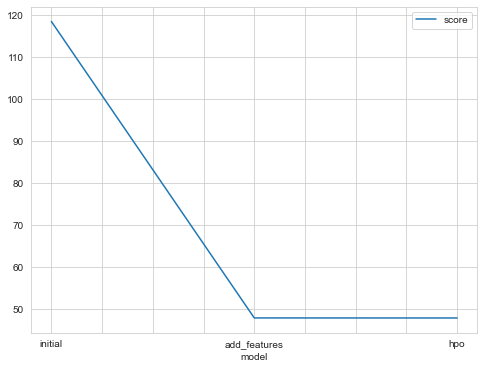

In [175]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [118.456660, 47.885773, 47.877308]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

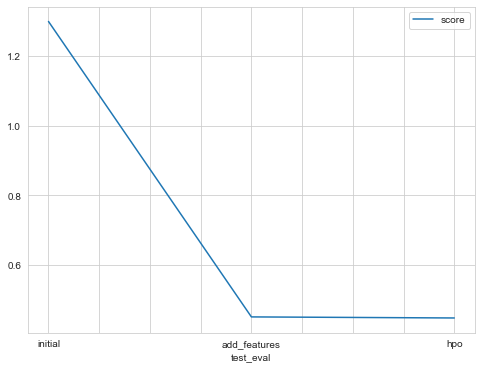

In [176]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.3, 0.451, 0.44793]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})